In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

import seaborn as sns
from copy import deepcopy

import itertools

sns.set_style("darkgrid")

def flatten(t):
    return [item for sublist in t for item in sublist]

pd.set_option('max_columns', None)

In [89]:
results_complete = pd.read_csv('./results_summary_test.csv', delimiter=';')
results_complete = results_complete[results_complete['i_net_nas'] == False]
results_complete_columns = list(results_complete.columns)

results_summary = pd.read_csv('./results_summary_test.csv', delimiter=';')
results_summary = results_summary[results_summary['i_net_nas'] == False]
results_summary_columns = list(results_summary.columns)

In [90]:
colmuns_identifier = [
                  'function_family_maximum_depth',
                  'function_family_decision_sparsity', 
                  'function_family_dt_type',
                  'data_dt_type_train',
                  'data_number_of_variables',
                  'data_noise_injected_level',
                  'lambda_net_lambda_network_layers',
                  'lambda_net_optimizer_lambda',
                  'i_net_dense_layers',
                  'i_net_dropout',
                  'i_net_loss',
                  'i_net_interpretation_dataset_size',
                  'i_net_function_representation_type',
                  'evaluation_eval_data_description_eval_data_function_generation_type',
                  'evaluation_eval_data_description_eval_data_noise_injected_level',
                 ]


In [91]:
results_summary.head()

,function_family_maximum_depth,function_family_beta,function_family_decision_sparsity,function_family_fully_grown,function_family_dt_type,function_family_basic_function_representation_length,function_family_function_representation_length,data_number_of_variables,data_num_classes,data_categorical_indices,data_dt_type_train,data_maximum_depth_train,data_decision_sparsity_train,data_function_generation_type,data_objective,data_x_max,data_x_min,data_x_distrib,data_lambda_dataset_size,data_noise_injected_level,data_noise_injected_type,lambda_net_epochs_lambda,lambda_net_early_stopping_lambda,lambda_net_early_stopping_min_delta_lambda,lambda_net_batch_lambda,lambda_net_dropout_lambda,lambda_net_lambda_network_layers,lambda_net_optimizer_lambda,lambda_net_loss_lambda,lambda_net_number_of_lambda_weights,lambda_net_number_initializations_lambda,lambda_net_number_of_trained_lambda_nets,i_net_dense_layers,i_net_convolution_layers,i_net_lstm_layers,i_net_dropout,i_net_optimizer,i_net_learning_rate,i_net_loss,i_net_metrics,i_net_epochs,i_net_early_stopping,i_net_batch_size,i_net_interpretation_dataset_size,i_net_test_size,i_net_function_representation_type,i_net_normalize_lambda_nets,i_net_optimize_decision_function,i_net_function_value_loss,i_net_soft_labels,i_net_data_reshape_version,i_net_nas,i_net_nas_type,i_net_nas_trials,evaluation_random_evaluation_dataset_size,evaluation_per_network_optimization_dataset_size,evaluation_sklearn_dt_benchmark,evaluation_sdt_benchmark,evaluation_different_eval_data,evaluation_eval_data_description_eval_data_function_generation_type,evaluation_eval_data_description_eval_data_lambda_dataset_size,evaluation_eval_data_description_eval_data_noise_injected_level,evaluation_eval_data_description_eval_data_noise_injected_type,evaluation_eval_data_description_eval_data_number_of_trained_lambda_nets,evaluation_eval_data_description_eval_data_interpretation_dataset_size,computation_load_model,computation_n_jobs,computation_use_gpu,computation_gpu_numbers,computation_RANDOM_SEED,train_dt_scores_soft_binary_crossentropy,train_dt_scores_soft_binary_crossentropy_median,train_dt_scores_soft_binary_crossentropy_data_random,train_dt_scores_soft_binary_crossentropy_data_random_median,train_dt_scores_binary_crossentropy,train_dt_scores_binary_crossentropy_median,train_dt_scores_binary_crossentropy_data_random,train_dt_scores_binary_crossentropy_data_random_median,train_dt_scores_accuracy,train_dt_scores_accuracy_median,train_dt_scores_accuracy_data_random,train_dt_scores_accuracy_data_random_median,train_dt_scores_f1_score,train_dt_scores_f1_score_median,train_dt_scores_f1_score_data_random,train_dt_scores_f1_score_data_random_median,train_dt_scores_runtime,train_dt_scores_runtime_median,train_inet_scores_soft_binary_crossentropy,train_inet_scores_soft_binary_crossentropy_median,train_inet_scores_binary_crossentropy,train_inet_scores_binary_crossentropy_median,train_inet_scores_accuracy,train_inet_scores_accuracy_median,train_inet_scores_f1_score,train_inet_scores_f1_score_median,train_inet_scores_runtime,train_inet_scores_runtime_median,valid_dt_scores_soft_binary_crossentropy,valid_dt_scores_soft_binary_crossentropy_median,valid_dt_scores_soft_binary_crossentropy_data_random,valid_dt_scores_soft_binary_crossentropy_data_random_median,valid_dt_scores_binary_crossentropy,valid_dt_scores_binary_crossentropy_median,valid_dt_scores_binary_crossentropy_data_random,valid_dt_scores_binary_crossentropy_data_random_median,valid_dt_scores_accuracy,valid_dt_scores_accuracy_median,valid_dt_scores_accuracy_data_random,valid_dt_scores_accuracy_data_random_median,valid_dt_scores_f1_score,valid_dt_scores_f1_score_median,valid_dt_scores_f1_score_data_random,valid_dt_scores_f1_score_data_random_median,valid_dt_scores_runtime,valid_dt_scores_runtime_median,valid_inet_scores_soft_binary_crossentropy,valid_inet_scores_soft_binary_crossentropy_median,valid_inet_scores_binary_crossentropy,valid_inet_scores_binary_crossentropy_median,valid_inet

In [92]:
columns_inet = []
for column in results_summary_columns:
    if 'inet_scores' in column:
        columns_inet.append(column)
results_summary_inet = results_summary[flatten([colmuns_identifier, columns_inet])]

columns_inet_rename = []
for column in columns_inet:
    column = column.replace('inet_scores_', '')
    columns_inet_rename.append(column)

results_summary_inet.columns = flatten([colmuns_identifier, columns_inet_rename])

#results_summary_inet.insert(0, 'scores_type', 'inet_scores')
results_summary_inet.insert(0, 'scores_type', [dt_type + str(decision_sparsity) + '_inet_scores' for dt_type, decision_sparsity in zip(results_summary_inet['function_family_dt_type'].values, results_summary_inet['function_family_decision_sparsity'].values)])

    
print(results_summary_inet.shape)
results_summary_inet

(3, 121)


,scores_type,function_family_maximum_depth,function_family_decision_sparsity,function_family_dt_type,data_dt_type_train,data_number_of_variables,data_noise_injected_level,lambda_net_lambda_network_layers,lambda_net_optimizer_lambda,i_net_dense_layers,i_net_dropout,i_net_loss,i_net_interpretation_dataset_size,i_net_function_representation_type,evaluation_eval_data_description_eval_data_function_generation_type,evaluation_eval_data_description_eval_data_noise_injected_level,train_soft_binary_crossentropy,train_soft_binary_crossentropy_median,train_binary_crossentropy,train_binary_crossentropy_median,train_accuracy,train_accuracy_median,train_f1_score,train_f1_score_median,train_runtime,train_runtime_median,valid_soft_binary_crossentropy,valid_soft_binary_crossentropy_median,valid_binary_crossentropy,valid_binary_crossentropy_median,valid_accuracy,valid_accuracy_median,valid_f1_score,valid_f1_score_median,valid_runtime,valid_runtime_median,test_soft_binary_crossentropy,test_soft_binary_crossentropy_median,test_binary_crossentropy,test_binary_crossentropy_median,test_accuracy,test_accuracy_median,test_f1_score,test_f1_score_median,test_runtime,test_runtime_median,soft_binary_crossentropy_adult_1000,binary_crossentropy_adult_1000,accuracy_adult_1000,f1_score_adult_1000,runtime_adult_1000,soft_binary_crossentropy_titanic_1000,binary_crossentropy_titanic_1000,accuracy_titanic_1000,f1_score_titanic_1000,runtime_titanic_1000,soft_binary_crossentropy_absenteeism_1000,binary_crossentropy_absenteeism_1000,accuracy_absenteeism_1000,f1_score_absenteeism_1000,runtime_absenteeism_1000,soft_binary_crossentropy_adult_10000,binary_crossentropy_adult_10000,accuracy_adult_10000,f1_score_adult_10000,runtime_adult_10000,soft_binary_crossentropy_titanic_10000,binary_crossentropy_titanic_10000,accuracy_titanic_10000,f1_score_titanic_10000,runtime_titanic_10000,soft_binary_crossentropy_absenteeism_10000,binary_crossentropy_absenteeism_10000,accuracy_absenteeism_10000,f1_score_absenteeism_10000,runtime_absenteeism_10000,soft_binary_crossentropy_adult_100000,binary_crossentropy_adult_100000,accuracy_adult_100000,f1_score_adult_100000,runtime_adult_100000,soft_binary_crossentropy_titanic_100000,binary_crossentropy_titanic_100000,accuracy_titanic_100000,f1_score_titanic_100000,runtime_titanic_100000,soft_binary_crossentropy_absenteeism_100000,binary_crossentropy_absenteeism_100000,accuracy_absenteeism_100000,f1_score_absenteeism_100000,runtime_absenteeism_100000,soft_binary_crossentropy_adult_1000000,binary_crossentropy_adult_1000000,accuracy_adult_1000000,f1_score_adult_1000000,runtime_adult_1000000,soft_binary_crossentropy_titanic_1000000,binary_crossentropy_titanic_1000000,accuracy_titanic_1000000,f1_score_titanic_1000000,runtime_titanic_1000000,soft_binary_crossentropy_absenteeism_1000000,binary_crossentropy_absenteeism_1000000,accuracy_absenteeism_1000000,f1_score_absenteeism_1000000,runtime_absenteeism_1000000,soft_binary_crossentropy_adult_TRAIN_DATA,binary_crossentropy_adult_TRAIN_DATA,accuracy_adult_TRAIN_DATA,f1_score_adult_TRAIN_DATA,runtime_adult_TRAIN_DATA,soft_binary_crossentropy_titanic_TRAIN_DATA,binary_crossentropy_titanic_TRAIN_DATA,accuracy_titanic_TRAIN_DATA,f1_score_titanic_TRAIN_DATA,runtime_titanic_TRAIN_DATA,soft_binary_crossentropy_absenteeism_TRAIN_DATA,binary_crossentropy_absenteeism_TRAIN_DATA,accuracy_absenteeism_TRAIN_DATA,f1_score_absenteeism_TRAIN_DATA,runtime_absenteeism_TRAIN_DATA
0,SDT30_inet_scores,3,30,SDT,vanilla,30,0,[128],adam,"[2048, 1024, 256, 128]","[0.1, 0.1, 0.1, 0]",binary_crossentropy,10000,1,make_classification,0,0.672935,0.680834,0.664080,0.674396,0.609160,0.6288,0.415187,0.635096,0.000827,0.000827,0.671600,0.675432,0.662063,0.670127,0.611368,0.6260,0.385372,0.591839,0.000922,0.000922,0.688359,0.693185,0.688997,0.693857,0.543984,0.5240,0.315021,0.000000,0.001249,0.001249,0.790568,0.981713,0.327806,0.491640,0.061205,0.698089,0.708810,0.374302,0.544715,0.061329,0.680341,0.656101,0.668919,0.000000,0.061567,0.79

In [93]:
columns_dt_distilled = []
for column in results_summary_columns:
    if 'dt_scores' in column:
        if 'data_random' not in column:
            columns_dt_distilled.append(column)
results_summary_dt_distilled = results_summary[flatten([colmuns_identifier, columns_dt_distilled])]

columns_dt_distilled_rename = []
for column in columns_dt_distilled:
    column = column.replace('dt_scores_','')
    columns_dt_distilled_rename.append(column)

results_summary_dt_distilled.columns = flatten([colmuns_identifier, columns_dt_distilled_rename])
    
#results_summary_dt_distilled.insert(0, 'scores_type', 'dt_scores')
results_summary_dt_distilled.insert(0, 'scores_type', [dt_type + str(decision_sparsity) + '_dt_scores' for dt_type, decision_sparsity in zip(results_summary_dt_distilled['function_family_dt_type'].values, results_summary_dt_distilled['function_family_decision_sparsity'].values)])

    
print(results_summary_dt_distilled.shape)
results_summary_dt_distilled

(3, 121)


,scores_type,function_family_maximum_depth,function_family_decision_sparsity,function_family_dt_type,data_dt_type_train,data_number_of_variables,data_noise_injected_level,lambda_net_lambda_network_layers,lambda_net_optimizer_lambda,i_net_dense_layers,i_net_dropout,i_net_loss,i_net_interpretation_dataset_size,i_net_function_representation_type,evaluation_eval_data_description_eval_data_function_generation_type,evaluation_eval_data_description_eval_data_noise_injected_level,train_soft_binary_crossentropy,train_soft_binary_crossentropy_median,train_binary_crossentropy,train_binary_crossentropy_median,train_accuracy,train_accuracy_median,train_f1_score,train_f1_score_median,train_runtime,train_runtime_median,valid_soft_binary_crossentropy,valid_soft_binary_crossentropy_median,valid_binary_crossentropy,valid_binary_crossentropy_median,valid_accuracy,valid_accuracy_median,valid_f1_score,valid_f1_score_median,valid_runtime,valid_runtime_median,test_soft_binary_crossentropy,test_soft_binary_crossentropy_median,test_binary_crossentropy,test_binary_crossentropy_median,test_accuracy,test_accuracy_median,test_f1_score,test_f1_score_median,test_runtime,test_runtime_median,soft_binary_crossentropy_adult_1000,binary_crossentropy_adult_1000,accuracy_adult_1000,f1_score_adult_1000,runtime_adult_1000,soft_binary_crossentropy_titanic_1000,binary_crossentropy_titanic_1000,accuracy_titanic_1000,f1_score_titanic_1000,runtime_titanic_1000,soft_binary_crossentropy_absenteeism_1000,binary_crossentropy_absenteeism_1000,accuracy_absenteeism_1000,f1_score_absenteeism_1000,runtime_absenteeism_1000,soft_binary_crossentropy_adult_10000,binary_crossentropy_adult_10000,accuracy_adult_10000,f1_score_adult_10000,runtime_adult_10000,soft_binary_crossentropy_titanic_10000,binary_crossentropy_titanic_10000,accuracy_titanic_10000,f1_score_titanic_10000,runtime_titanic_10000,soft_binary_crossentropy_absenteeism_10000,binary_crossentropy_absenteeism_10000,accuracy_absenteeism_10000,f1_score_absenteeism_10000,runtime_absenteeism_10000,soft_binary_crossentropy_adult_100000,binary_crossentropy_adult_100000,accuracy_adult_100000,f1_score_adult_100000,runtime_adult_100000,soft_binary_crossentropy_titanic_100000,binary_crossentropy_titanic_100000,accuracy_titanic_100000,f1_score_titanic_100000,runtime_titanic_100000,soft_binary_crossentropy_absenteeism_100000,binary_crossentropy_absenteeism_100000,accuracy_absenteeism_100000,f1_score_absenteeism_100000,runtime_absenteeism_100000,soft_binary_crossentropy_adult_1000000,binary_crossentropy_adult_1000000,accuracy_adult_1000000,f1_score_adult_1000000,runtime_adult_1000000,soft_binary_crossentropy_titanic_1000000,binary_crossentropy_titanic_1000000,accuracy_titanic_1000000,f1_score_titanic_1000000,runtime_titanic_1000000,soft_binary_crossentropy_absenteeism_1000000,binary_crossentropy_absenteeism_1000000,accuracy_absenteeism_1000000,f1_score_absenteeism_1000000,runtime_absenteeism_1000000,soft_binary_crossentropy_adult_TRAIN_DATA,binary_crossentropy_adult_TRAIN_DATA,accuracy_adult_TRAIN_DATA,f1_score_adult_TRAIN_DATA,runtime_adult_TRAIN_DATA,soft_binary_crossentropy_titanic_TRAIN_DATA,binary_crossentropy_titanic_TRAIN_DATA,accuracy_titanic_TRAIN_DATA,f1_score_titanic_TRAIN_DATA,runtime_titanic_TRAIN_DATA,soft_binary_crossentropy_absenteeism_TRAIN_DATA,binary_crossentropy_absenteeism_TRAIN_DATA,accuracy_absenteeism_TRAIN_DATA,f1_score_absenteeism_TRAIN_DATA,runtime_absenteeism_TRAIN_DATA
0,SDT30_dt_scores,3,30,SDT,vanilla,30,0,[128],adam,"[2048, 1024, 256, 128]","[0.1, 0.1, 0.1, 0]",binary_crossentropy,10000,1,make_classification,0,0.418835,0.417086,0.157253,0.155309,0.947688,0.9504,0.944346,0.952856,35.902472,33.790338,0.419020,0.412735,0.168030,0.156048,0.942928,0.9516,0.938867,0.951444,35.991359,35.079765,0.476961,0.477937,0.291893,0.306190,0.872816,0.8776,0.856945,0.871641,35.944780,33.850326,0.949230,2.218997,0.325042,0.490614,6.053239,0.584836,0.556782,0.787709,0.703125,6.851543,0.682906,0.791041,0.608108,0.602740,6.740530,

In [94]:
columns_dt_distilled_random_data = []
for column in results_summary_columns:
    if 'dt_scores' in column:
        if 'runtime' not in column:
            if 'data_random' in column:
                columns_dt_distilled_random_data.append(column)
        else: 
            columns_dt_distilled_random_data.append(column)
results_summary_dt_distilled_random_data = results_summary[flatten([colmuns_identifier, columns_dt_distilled_random_data])]

columns_dt_distilled_random_data_rename = []
for column in columns_dt_distilled_random_data:
    column = column.replace('dt_scores_','')
    column = column.replace('_data_random','')
    columns_dt_distilled_random_data_rename.append(column)

results_summary_dt_distilled_random_data.columns = flatten([colmuns_identifier, columns_dt_distilled_random_data_rename])

#results_summary_dt_distilled_random_data.insert(0, 'scores_type', 'dt_scores_data_random')
results_summary_dt_distilled_random_data.insert(0, 'scores_type', [dt_type + str(decision_sparsity) + '_dt_scores_data_random' for dt_type, decision_sparsity in zip(results_summary_dt_distilled_random_data['function_family_dt_type'].values, results_summary_dt_distilled_random_data['function_family_decision_sparsity'].values)])


print(results_summary_dt_distilled_random_data.shape)
results_summary_dt_distilled_random_data

(3, 121)


,scores_type,function_family_maximum_depth,function_family_decision_sparsity,function_family_dt_type,data_dt_type_train,data_number_of_variables,data_noise_injected_level,lambda_net_lambda_network_layers,lambda_net_optimizer_lambda,i_net_dense_layers,i_net_dropout,i_net_loss,i_net_interpretation_dataset_size,i_net_function_representation_type,evaluation_eval_data_description_eval_data_function_generation_type,evaluation_eval_data_description_eval_data_noise_injected_level,train_soft_binary_crossentropy,train_soft_binary_crossentropy_median,train_binary_crossentropy,train_binary_crossentropy_median,train_accuracy,train_accuracy_median,train_f1_score,train_f1_score_median,train_runtime,train_runtime_median,valid_soft_binary_crossentropy,valid_soft_binary_crossentropy_median,valid_binary_crossentropy,valid_binary_crossentropy_median,valid_accuracy,valid_accuracy_median,valid_f1_score,valid_f1_score_median,valid_runtime,valid_runtime_median,test_soft_binary_crossentropy,test_soft_binary_crossentropy_median,test_binary_crossentropy,test_binary_crossentropy_median,test_accuracy,test_accuracy_median,test_f1_score,test_f1_score_median,test_runtime,test_runtime_median,soft_binary_crossentropy_adult_1000,binary_crossentropy_adult_1000,accuracy_adult_1000,f1_score_adult_1000,runtime_adult_1000,soft_binary_crossentropy_titanic_1000,binary_crossentropy_titanic_1000,accuracy_titanic_1000,f1_score_titanic_1000,runtime_titanic_1000,soft_binary_crossentropy_absenteeism_1000,binary_crossentropy_absenteeism_1000,accuracy_absenteeism_1000,f1_score_absenteeism_1000,runtime_absenteeism_1000,soft_binary_crossentropy_adult_10000,binary_crossentropy_adult_10000,accuracy_adult_10000,f1_score_adult_10000,runtime_adult_10000,soft_binary_crossentropy_titanic_10000,binary_crossentropy_titanic_10000,accuracy_titanic_10000,f1_score_titanic_10000,runtime_titanic_10000,soft_binary_crossentropy_absenteeism_10000,binary_crossentropy_absenteeism_10000,accuracy_absenteeism_10000,f1_score_absenteeism_10000,runtime_absenteeism_10000,soft_binary_crossentropy_adult_100000,binary_crossentropy_adult_100000,accuracy_adult_100000,f1_score_adult_100000,runtime_adult_100000,soft_binary_crossentropy_titanic_100000,binary_crossentropy_titanic_100000,accuracy_titanic_100000,f1_score_titanic_100000,runtime_titanic_100000,soft_binary_crossentropy_absenteeism_100000,binary_crossentropy_absenteeism_100000,accuracy_absenteeism_100000,f1_score_absenteeism_100000,runtime_absenteeism_100000,soft_binary_crossentropy_adult_1000000,binary_crossentropy_adult_1000000,accuracy_adult_1000000,f1_score_adult_1000000,runtime_adult_1000000,soft_binary_crossentropy_titanic_1000000,binary_crossentropy_titanic_1000000,accuracy_titanic_1000000,f1_score_titanic_1000000,runtime_titanic_1000000,soft_binary_crossentropy_absenteeism_1000000,binary_crossentropy_absenteeism_1000000,accuracy_absenteeism_1000000,f1_score_absenteeism_1000000,runtime_absenteeism_1000000,soft_binary_crossentropy_adult_TRAIN_DATA,binary_crossentropy_adult_TRAIN_DATA,accuracy_adult_TRAIN_DATA,f1_score_adult_TRAIN_DATA,runtime_adult_TRAIN_DATA,soft_binary_crossentropy_titanic_TRAIN_DATA,binary_crossentropy_titanic_TRAIN_DATA,accuracy_titanic_TRAIN_DATA,f1_score_titanic_TRAIN_DATA,runtime_titanic_TRAIN_DATA,soft_binary_crossentropy_absenteeism_TRAIN_DATA,binary_crossentropy_absenteeism_TRAIN_DATA,accuracy_absenteeism_TRAIN_DATA,f1_score_absenteeism_TRAIN_DATA,runtime_absenteeism_TRAIN_DATA
0,SDT30_dt_scores_data_random,3,30,SDT,vanilla,30,0,[128],adam,"[2048, 1024, 256, 128]","[0.1, 0.1, 0.1, 0]",binary_crossentropy,10000,1,make_classification,0,0.418213,0.415962,0.141390,0.134539,0.954038,0.9585,0.951143,0.958239,35.902472,33.790338,0.418720,0.411257,0.153476,0.136386,0.948764,0.9574,0.945088,0.956187,35.991359,35.079765,0.473580,0.476425,0.275939,0.291126,0.883312,0.8855,0.865065,0.882915,35.944780,33.850326,0.332027,0.027183,0.989,0.99447,6.053239,0.455224,0.073204,0.982,0.989910,6.851543,0.484584,0.145372,0.948,0.907473,6.74053

In [95]:
results_summary_reduced = pd.concat([results_summary_inet, 
                                     results_summary_dt_distilled, 
                                     results_summary_dt_distilled_random_data]).reset_index(drop=True)
results_summary_reduced_columns = results_summary_reduced.columns
results_summary_reduced

,scores_type,function_family_maximum_depth,function_family_decision_sparsity,function_family_dt_type,data_dt_type_train,data_number_of_variables,data_noise_injected_level,lambda_net_lambda_network_layers,lambda_net_optimizer_lambda,i_net_dense_layers,i_net_dropout,i_net_loss,i_net_interpretation_dataset_size,i_net_function_representation_type,evaluation_eval_data_description_eval_data_function_generation_type,evaluation_eval_data_description_eval_data_noise_injected_level,train_soft_binary_crossentropy,train_soft_binary_crossentropy_median,train_binary_crossentropy,train_binary_crossentropy_median,train_accuracy,train_accuracy_median,train_f1_score,train_f1_score_median,train_runtime,train_runtime_median,valid_soft_binary_crossentropy,valid_soft_binary_crossentropy_median,valid_binary_crossentropy,valid_binary_crossentropy_median,valid_accuracy,valid_accuracy_median,valid_f1_score,valid_f1_score_median,valid_runtime,valid_runtime_median,test_soft_binary_crossentropy,test_soft_binary_crossentropy_median,test_binary_crossentropy,test_binary_crossentropy_median,test_accuracy,test_accuracy_median,test_f1_score,test_f1_score_median,test_runtime,test_runtime_median,soft_binary_crossentropy_adult_1000,binary_crossentropy_adult_1000,accuracy_adult_1000,f1_score_adult_1000,runtime_adult_1000,soft_binary_crossentropy_titanic_1000,binary_crossentropy_titanic_1000,accuracy_titanic_1000,f1_score_titanic_1000,runtime_titanic_1000,soft_binary_crossentropy_absenteeism_1000,binary_crossentropy_absenteeism_1000,accuracy_absenteeism_1000,f1_score_absenteeism_1000,runtime_absenteeism_1000,soft_binary_crossentropy_adult_10000,binary_crossentropy_adult_10000,accuracy_adult_10000,f1_score_adult_10000,runtime_adult_10000,soft_binary_crossentropy_titanic_10000,binary_crossentropy_titanic_10000,accuracy_titanic_10000,f1_score_titanic_10000,runtime_titanic_10000,soft_binary_crossentropy_absenteeism_10000,binary_crossentropy_absenteeism_10000,accuracy_absenteeism_10000,f1_score_absenteeism_10000,runtime_absenteeism_10000,soft_binary_crossentropy_adult_100000,binary_crossentropy_adult_100000,accuracy_adult_100000,f1_score_adult_100000,runtime_adult_100000,soft_binary_crossentropy_titanic_100000,binary_crossentropy_titanic_100000,accuracy_titanic_100000,f1_score_titanic_100000,runtime_titanic_100000,soft_binary_crossentropy_absenteeism_100000,binary_crossentropy_absenteeism_100000,accuracy_absenteeism_100000,f1_score_absenteeism_100000,runtime_absenteeism_100000,soft_binary_crossentropy_adult_1000000,binary_crossentropy_adult_1000000,accuracy_adult_1000000,f1_score_adult_1000000,runtime_adult_1000000,soft_binary_crossentropy_titanic_1000000,binary_crossentropy_titanic_1000000,accuracy_titanic_1000000,f1_score_titanic_1000000,runtime_titanic_1000000,soft_binary_crossentropy_absenteeism_1000000,binary_crossentropy_absenteeism_1000000,accuracy_absenteeism_1000000,f1_score_absenteeism_1000000,runtime_absenteeism_1000000,soft_binary_crossentropy_adult_TRAIN_DATA,binary_crossentropy_adult_TRAIN_DATA,accuracy_adult_TRAIN_DATA,f1_score_adult_TRAIN_DATA,runtime_adult_TRAIN_DATA,soft_binary_crossentropy_titanic_TRAIN_DATA,binary_crossentropy_titanic_TRAIN_DATA,accuracy_titanic_TRAIN_DATA,f1_score_titanic_TRAIN_DATA,runtime_titanic_TRAIN_DATA,soft_binary_crossentropy_absenteeism_TRAIN_DATA,binary_crossentropy_absenteeism_TRAIN_DATA,accuracy_absenteeism_TRAIN_DATA,f1_score_absenteeism_TRAIN_DATA,runtime_absenteeism_TRAIN_DATA
0,SDT30_inet_scores,3,30,SDT,vanilla,30,0,[128],adam,"[2048, 1024, 256, 128]","[0.1, 0.1, 0.1, 0]",binary_crossentropy,10000,1,make_classification,0,0.672935,0.680834,0.664080,0.674396,0.609160,0.6288,0.415187,0.635096,0.000827,0.000827,0.671600,0.675432,0.662063,0.670127,0.611368,0.6260,0.385372,0.591839,0.000922,0.000922,0.688359,0.693185,0.688997,0.693857,0.543984,0.5240,0.315021,0.000000,0.001249,0.001249,0.790568,0.981713,0.327806,0.491640,0.061205,0.698089,0.708810,0.374302,0.544715,0.061329,0.680341,0.656101,0.668919,0.000000,0.061567,0.79

In [96]:
colmuns_identifier.append('scores_type')
not_considered_random_dataset_sizes = ['1000', '100000', '1000000']

In [97]:
results_summary_reduced_columns = []
for column in results_summary_reduced_columns:  
    if 'soft' not in column:           
        if 'median' not in column:
            tokens = column.split('_')
            integer = [token for token in tokens if token.isdigit()]
            if len(integer) > 0:
                integer = integer[0]
            if integer not in not_considered_random_dataset_sizes:                    
                results_summary_reduced_columns.append(column)

results_summary_reduced_with_identifier_columns = flatten([colmuns_identifier, results_summary_reduced_columns])
results_summary_reduced_with_identifier = results_summary_reduced[results_summary_reduced_with_identifier_columns]
results_summary_reduced_with_identifier

,function_family_maximum_depth,function_family_decision_sparsity,function_family_dt_type,data_dt_type_train,data_number_of_variables,data_noise_injected_level,lambda_net_lambda_network_layers,lambda_net_optimizer_lambda,i_net_dense_layers,i_net_dropout,i_net_loss,i_net_interpretation_dataset_size,i_net_function_representation_type,evaluation_eval_data_description_eval_data_function_generation_type,evaluation_eval_data_description_eval_data_noise_injected_level,scores_type
0,3,30,SDT,vanilla,30,0,[128],adam,"[2048, 1024, 256, 128]","[0.1, 0.1, 0.1, 0]",binary_crossentropy,10000,1,make_classification,0,SDT30_inet_scores
1,4,30,SDT,vanilla,30,0,[128],adam,"[2048, 1024, 256, 128]","[0.1, 0.1, 0.1, 0]",binary_crossentropy,10000,1,make_classification,0,SDT30_inet_scores
2,5,30,SDT,vanilla,30,0,[128],adam,"[2048, 1024, 256, 128]","[0.1, 0.1, 0.1, 0]",binary_crossentropy,10000,1,make_classification,0,SDT30_inet_scores
3,3,30,SDT,vanilla,30,0,[128],adam,"[2048, 1024, 256, 128]","[0.1, 0.1, 0.1, 0]",binary_crossentropy,10000,1,make_classification,0,SDT30_dt_scores
4,4,30,SDT,vanilla,30,0,[128],adam,"[2048, 1024, 256, 128]","[0.1, 0.1, 0.1, 0]",binary_crossentropy,10000,1,make_classification,0,SDT30_dt_scores
5,5,30,SDT,vanilla,30,0,[128],adam,"[2048, 1024, 256, 128]","[0.1, 0.1, 0.1, 0]",binary_crossentropy,10000,1,make_classification,0,SDT30_dt_scores
6,3,30,SDT,vanilla,30,0,[128],adam,"[2048, 1024, 256, 128]","[0.1, 0.1, 0.1, 0]",binary_crossentropy,10000,1,make_classification,0,SDT30_dt_scores_data_random
7,4,30,SDT,vanilla,30,0,[128],adam,"[2048, 1024, 256, 128]","[0.1, 0.1, 0.1, 0]",binary_crossentropy,10000,1,make_classification,0,SDT30_dt_scores_data_random
8,5,30,SDT,vanilla,30,0,[128],adam,"[2048, 1024, 256, 128]","[0.1, 0.1, 0.1, 0]",binary_crossentropy,10000,1,make_classification,0,SDT30_dt_scores_data_random


In [104]:
results_summary_reduced_binary_crossentropy_columns = []
for column in results_summary_reduced_columns:  
    if 'binary_crossentropy' in column:
        if 'soft' not in column:           
            if 'median' not in column:
                tokens = column.split('_')
                integer = [token for token in tokens if token.isdigit()]
                if len(integer) > 0:
                    integer = integer[0]
                if integer not in not_considered_random_dataset_sizes:                    
                    results_summary_reduced_binary_crossentropy_columns.append(column)

results_summary_reduced_binary_crossentropy_with_identifier_columns = flatten([colmuns_identifier, results_summary_reduced_binary_crossentropy_columns])
results_summary_reduced_binary_crossentropy_with_identifier = results_summary_reduced[results_summary_reduced_binary_crossentropy_with_identifier_columns]
results_summary_reduced_binary_crossentropy_with_identifier

,function_family_maximum_depth,function_family_decision_sparsity,function_family_dt_type,data_dt_type_train,data_number_of_variables,data_noise_injected_level,lambda_net_lambda_network_layers,lambda_net_optimizer_lambda,i_net_dense_layers,i_net_dropout,i_net_loss,i_net_interpretation_dataset_size,i_net_function_representation_type,evaluation_eval_data_description_eval_data_function_generation_type,evaluation_eval_data_description_eval_data_noise_injected_level,scores_type
0,3,30,SDT,vanilla,30,0,[128],adam,"[2048, 1024, 256, 128]","[0.1, 0.1, 0.1, 0]",binary_crossentropy,10000,1,make_classification,0,SDT30_inet_scores
1,4,30,SDT,vanilla,30,0,[128],adam,"[2048, 1024, 256, 128]","[0.1, 0.1, 0.1, 0]",binary_crossentropy,10000,1,make_classification,0,SDT30_inet_scores
2,5,30,SDT,vanilla,30,0,[128],adam,"[2048, 1024, 256, 128]","[0.1, 0.1, 0.1, 0]",binary_crossentropy,10000,1,make_classification,0,SDT30_inet_scores
3,3,30,SDT,vanilla,30,0,[128],adam,"[2048, 1024, 256, 128]","[0.1, 0.1, 0.1, 0]",binary_crossentropy,10000,1,make_classification,0,SDT30_dt_scores
4,4,30,SDT,vanilla,30,0,[128],adam,"[2048, 1024, 256, 128]","[0.1, 0.1, 0.1, 0]",binary_crossentropy,10000,1,make_classification,0,SDT30_dt_scores
5,5,30,SDT,vanilla,30,0,[128],adam,"[2048, 1024, 256, 128]","[0.1, 0.1, 0.1, 0]",binary_crossentropy,10000,1,make_classification,0,SDT30_dt_scores
6,3,30,SDT,vanilla,30,0,[128],adam,"[2048, 1024, 256, 128]","[0.1, 0.1, 0.1, 0]",binary_crossentropy,10000,1,make_classification,0,SDT30_dt_scores_data_random
7,4,30,SDT,vanilla,30,0,[128],adam,"[2048, 1024, 256, 128]","[0.1, 0.1, 0.1, 0]",binary_crossentropy,10000,1,make_classification,0,SDT30_dt_scores_data_random
8,5,30,SDT,vanilla,30,0,[128],adam,"[2048, 1024, 256, 128]","[0.1, 0.1, 0.1, 0]",binary_crossentropy,10000,1,make_classification,0,SDT30_dt_scores_data_random


In [99]:
results_summary_reduced_accuracy_columns = []
for column in results_summary_reduced_columns:  
    if 'accuracy' in column:
        if 'soft' not in column:           
            if 'median' not in column:
                tokens = column.split('_')
                integer = [token for token in tokens if token.isdigit()]
                if len(integer) > 0:
                    integer = integer[0]
                if integer not in not_considered_random_dataset_sizes:                    
                    results_summary_reduced_accuracy_columns.append(column)

results_summary_reduced_accuracy_with_identifier_columns = flatten([colmuns_identifier, results_summary_reduced_accuracy_columns])
results_summary_reduced_accuracy_with_identifier = results_summary_reduced[results_summary_reduced_accuracy_with_identifier_columns]
results_summary_reduced_accuracy_with_identifier


,function_family_maximum_depth,function_family_decision_sparsity,function_family_dt_type,data_dt_type_train,data_number_of_variables,data_noise_injected_level,lambda_net_lambda_network_layers,lambda_net_optimizer_lambda,i_net_dense_layers,i_net_dropout,i_net_loss,i_net_interpretation_dataset_size,i_net_function_representation_type,evaluation_eval_data_description_eval_data_function_generation_type,evaluation_eval_data_description_eval_data_noise_injected_level,scores_type
0,3,30,SDT,vanilla,30,0,[128],adam,"[2048, 1024, 256, 128]","[0.1, 0.1, 0.1, 0]",binary_crossentropy,10000,1,make_classification,0,SDT30_inet_scores
1,4,30,SDT,vanilla,30,0,[128],adam,"[2048, 1024, 256, 128]","[0.1, 0.1, 0.1, 0]",binary_crossentropy,10000,1,make_classification,0,SDT30_inet_scores
2,5,30,SDT,vanilla,30,0,[128],adam,"[2048, 1024, 256, 128]","[0.1, 0.1, 0.1, 0]",binary_crossentropy,10000,1,make_classification,0,SDT30_inet_scores
3,3,30,SDT,vanilla,30,0,[128],adam,"[2048, 1024, 256, 128]","[0.1, 0.1, 0.1, 0]",binary_crossentropy,10000,1,make_classification,0,SDT30_dt_scores
4,4,30,SDT,vanilla,30,0,[128],adam,"[2048, 1024, 256, 128]","[0.1, 0.1, 0.1, 0]",binary_crossentropy,10000,1,make_classification,0,SDT30_dt_scores
5,5,30,SDT,vanilla,30,0,[128],adam,"[2048, 1024, 256, 128]","[0.1, 0.1, 0.1, 0]",binary_crossentropy,10000,1,make_classification,0,SDT30_dt_scores
6,3,30,SDT,vanilla,30,0,[128],adam,"[2048, 1024, 256, 128]","[0.1, 0.1, 0.1, 0]",binary_crossentropy,10000,1,make_classification,0,SDT30_dt_scores_data_random
7,4,30,SDT,vanilla,30,0,[128],adam,"[2048, 1024, 256, 128]","[0.1, 0.1, 0.1, 0]",binary_crossentropy,10000,1,make_classification,0,SDT30_dt_scores_data_random
8,5,30,SDT,vanilla,30,0,[128],adam,"[2048, 1024, 256, 128]","[0.1, 0.1, 0.1, 0]",binary_crossentropy,10000,1,make_classification,0,SDT30_dt_scores_data_random


In [100]:
figsize = (20, 10)
font_scale = 2.5

legend_fontsize = 25
legend_loc = 2

color_1 = '#84b7e9'#'#c0d6ff'
color_2 = '#0a6fd3'#'#96bcff'
color_3 = '#06427e'#'#6ca1ff'

In [101]:
eval_data_string = 'accuracy_titanic_10000'

inet_structure = '[2048, 1024, 256, 128]'
number_of_variables = 30
#maximum_depth = 3

In [102]:
results_summary_reduced['data_number_of_variables']

0    30
1    30
2    30
3    30
4    30
5    30
6    30
7    30
8    30
Name: data_number_of_variables, dtype: int64

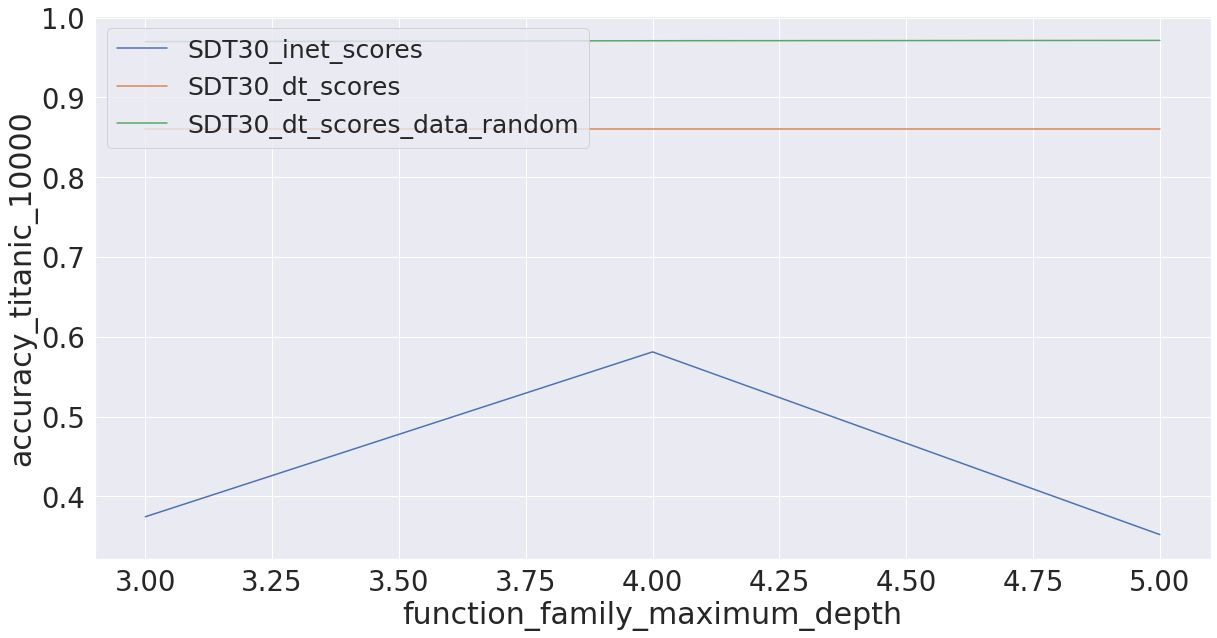

In [103]:
results_summary_reduced_plot = results_summary_reduced
results_summary_reduced_plot = results_summary_reduced_plot[results_summary_reduced_plot['i_net_dense_layers'] == inet_structure]
results_summary_reduced_plot = results_summary_reduced_plot[results_summary_reduced_plot['data_number_of_variables'] == number_of_variables]
#results_summary_reduced_plot = results_summary_reduced_plot[results_summary_reduced_plot['function_family_maximum_depth'] == maximum_depth]


sns.set(rc={'figure.figsize':figsize})
sns.set(font_scale=font_scale)

sns_plot = sns.lineplot(x='function_family_maximum_depth', #'data_number_of_variables', 'function_family_maximum_depth'
            y=eval_data_string,#'test_accuracy',
            hue='scores_type', 
            #palette=[color_1, color_2, color_3],
            data=results_summary_reduced_plot)
plt.legend(fontsize=legend_fontsize, loc = legend_loc)

#sns.despine(offset=10, trim=True)
sns_plot.get_figure().savefig('./evaluation_results/accuracy_lineplot_complete_grouped.pdf', bbox_inches = 'tight', pad_inches = 0)


# POLYNOMIAL RESULTS

In [10]:
#lambda_net_results_d3_n5_noNoise = {'mae': 0.013, 'r2': 0.994, 'std_error': 0.017}
#lambda_net_results_d3_n5_Noise01 = {'mae': 0.035, 'r2': 0.964, 'std_error': 0.045}
#lambda_net_results_d3_n5_Noise02 = {'mae': 0.054, 'r2': 0.915, 'std_error': 0.069}
#lambda_net_results_d3_n5_Noise03 = {'mae': 0.069, 'r2': 0.858, 'std_error': 0.086}

#lambda_net_results_d3_n10_noNoise = {'mae': 0.026, 'r2': 0.988, 'std_error': 0.034}
#lambda_net_results_d3_n10_Noise01 = {'mae': 0.068, 'r2': 0.921, 'std_error': 0.088}
#lambda_net_results_d3_n10_Noise02 = {'mae': 0.095, 'r2': 0.839, 'std_error': 0.121}
#lambda_net_results_d3_n10_Noise03 = {'mae': 0.115, 'r2': 0.743, 'std_error': 0.145}

#lambda_net_results_d3_n15_noNoise = {'mae': 0.044, 'r2': 0.974, 'std_error': 0.058}
#lambda_net_results_d3_n15_Noise01 = {'mae': 0.094, 'r2': 0.891, 'std_error': 0.120}
#lambda_net_results_d3_n15_Noise02 = {'mae': 0.129, 'r2': 0.777, 'std_error': 0.164}
#lambda_net_results_d3_n15_Noise03 = {'mae': 0.151, 'r2': 0.666, 'std_error': 0.190}


In [11]:
inet_train_time_d3_n5_noNoise = {'lambda_net_training': np.nan, 'interpretation_net_training': np.nan, 'application': np.array([0.0029 for i in range(100)])}
inet_train_time_d3_n5_Noise01 = {'lambda_net_training': 0, 'interpretation_net_training': 0, 'application': np.array([0.0029 for i in range(100)])}
inet_train_time_d3_n5_Noise02 = {'lambda_net_training': 0, 'interpretation_net_training': 0, 'application': np.array([0.0029 for i in range(100)])}
inet_train_time_d3_n5_Noise03 = {'lambda_net_training': 0, 'interpretation_net_training': 0, 'application': np.array([0.0029 for i in range(100)])}

inet_train_time_d3_n10_noNoise = {'lambda_net_training': np.nan, 'interpretation_net_training': np.nan, 'application': np.array([0.0030 for i in range(100)])}
inet_train_time_d3_n10_Noise01 = {'lambda_net_training': 0, 'interpretation_net_training': 0, 'application': np.array([0.0030 for i in range(100)])}
inet_train_time_d3_n10_Noise02 = {'lambda_net_training': 0, 'interpretation_net_training': 0, 'application': np.array([0.0030 for i in range(100)])}
inet_train_time_d3_n10_Noise03 = {'lambda_net_training': 0, 'interpretation_net_training': 0, 'application': np.array([0.0030 for i in range(100)])}

inet_train_time_d3_n15_noNoise = {'lambda_net_training': np.nan, 'interpretation_net_training': np.nan, 'application': np.array([0.0035 for i in range(100)])}
inet_train_time_d3_n15_Noise01 = {'lambda_net_training': 0, 'interpretation_net_training': 0, 'application': np.array([0.0035 for i in range(100)])}
inet_train_time_d3_n15_Noise02 = {'lambda_net_training': 0, 'interpretation_net_training': 0, 'application': np.array([0.0035 for i in range(100)])}
inet_train_time_d3_n15_Noise03 = {'lambda_net_training': 0, 'interpretation_net_training': 0, 'application': np.array([0.0035 for i in range(100)])}


In [12]:
inet_results_single_lambda_net_d3_n5_noNoise = {'mae': np.array([0.08810546, 0.1501757 , 0.2700043 , 0.12771317, 0.14647362,
       0.03913863, 0.13717574, 0.12436506, 0.20558953, 0.14193021,
       0.21345586, 0.08619374, 0.10064963, 0.13405795, 0.07916157,
       0.10627417, 0.20727588, 0.16375679, 0.0434536 , 0.279522  ,
       0.03964474, 0.15802054, 0.05974424, 0.14964646, 0.03543023,
       0.13075359, 0.08263976, 0.13742685, 0.13657092, 0.21824501,
       0.19102907, 0.07979021, 0.14714012, 0.1288562 , 0.09771346,
       0.24589616, 0.12346414, 0.1641061 , 0.05345226, 0.12799865,
       0.09091796, 0.18770134, 0.10956948, 0.08667824, 0.09880369,
       0.20067036, 0.12709309, 0.15230592, 0.17523693, 0.06261321,
       0.17788233, 0.06158442, 0.14064218, 0.07400467, 0.04476283,
       0.18497477, 0.242696  , 0.15095899, 0.09850042, 0.15635242,
       0.09874132, 0.20418195, 0.08345551, 0.11522099, 0.15085351,
       0.11868121, 0.22501875, 0.10483694, 0.05155044, 0.15379155,
       0.04893803, 0.3103288 , 0.17915139, 0.10501196, 0.07051785,
       0.26844797, 0.1497642 , 0.11081957, 0.19219775, 0.22614217,
       0.12333006, 0.06791483, 0.08578451, 0.09478783, 0.48085606,
       0.07894251, 0.0830882 , 0.09303589, 0.06312389, 0.30024132,
       0.1702867 , 0.12076234, 0.13867807, 0.144824  , 0.17403801,
       0.2699573 , 0.13793911, 0.10770293, 0.13749996, 0.18943591]), 
                               'r2': np.array([])}
inet_results_single_lambda_net_d3_n5_Noise01 = {'mae': np.array([0.09384301, 0.15443125, 0.2876708 , 0.1686547 , 0.1676896 ,
       0.05883972, 0.13660203, 0.12097859, 0.20891236, 0.14057793,
       0.21942991, 0.09661935, 0.15884788, 0.14222614, 0.08548529,
       0.09990228, 0.19149901, 0.16854486, 0.06049219, 0.26421854,
       0.03886591, 0.23656763, 0.14482395, 0.15398479, 0.03870595,
       0.11461877, 0.07680565, 0.13501021, 0.09412585, 0.20142354,
       0.2585854 , 0.26640245, 0.13938528, 0.1371384 , 0.13819255,
       0.24424575, 0.11253629, 0.17609075, 0.05823503, 0.14707632,
       0.08808401, 0.1827804 , 0.09803976, 0.08632692, 0.09678046,
       0.2380212 , 0.12780266, 0.1751127 , 0.12761663, 0.07192389,
       0.19524868, 0.07310316, 0.12510642, 0.11776665, 0.08017729,
       0.14309663, 0.23141618, 0.14482947, 0.07981611, 0.13352078,
       0.10638701, 0.20707378, 0.08040901, 0.11608346, 0.17033471,
       0.15888828, 0.22072348, 0.09226539, 0.08610757, 0.21200171,
       0.10826959, 0.29360443, 0.20337735, 0.14540441, 0.07592402,
       0.23360442, 0.154976  , 0.10176671, 0.21100302, 0.22469546,
       0.1222695 , 0.0792762 , 0.09804108, 0.07571917, 0.178104  ,
       0.10481115, 0.0829993 , 0.09551693, 0.12722024, 0.27807182,
       0.1597785 , 0.1212237 , 0.09193189, 0.15691629, 0.23306113,
       0.3136854 , 0.1186576 , 0.09652826, 0.11382571, 0.23066466]), 
                               'r2': np.array([])}
inet_results_single_lambda_net_d3_n5_Noise02 = {'mae': np.array([0.10470013, 0.16398558, 0.27881387, 0.1794928 , 0.15575698,
       0.05697883, 0.12286848, 0.14092392, 0.18598877, 0.16387947,
       0.19640161, 0.10377649, 0.18082847, 0.14429866, 0.09773429,
       0.11771294, 0.18015367, 0.16151044, 0.06124729, 0.27237806,
       0.0642956 , 0.27431893, 0.23518132, 0.14760649, 0.04401693,
       0.11862129, 0.08077917, 0.10077105, 0.11124934, 0.1407989 ,
       0.2804776 , 0.21536785, 0.14910862, 0.13112567, 0.13351151,
       0.24982947, 0.11577034, 0.17318884, 0.05952604, 0.24430162,
       0.0920067 , 0.19523036, 0.12103419, 0.09412535, 0.0974363 ,
       0.22282453, 0.16464739, 0.1844897 , 0.14482743, 0.07049234,
       0.20835747, 0.08023029, 0.12013154, 0.08985005, 0.07911579,
       0.1499733 , 0.22555347, 0.13943627, 0.08014005, 0.12416457,
       0.10997214, 0.2108395 , 0.09581013, 0.13073234, 0.18737666,
       0.16923492, 0.2362339 , 0.13310674, 0.07781056, 0.18701842,
       0.11075678, 0.3327304 , 0.22107585, 0.18686122, 0.08620755,
       0.16078652, 0.14070109, 0.12509961, 0.19021238, 0.20948303,
       0.10692197, 0.07122377, 0.10820896, 0.08056899, 0.17440158,
       0.07586408, 0.09870175, 0.12994763, 0.13241021, 0.2969053 ,
       0.19344963, 0.11796035, 0.09922345, 0.17405085, 0.14250843,
       0.27004164, 0.12889498, 0.11205166, 0.10756487, 0.2364518]), 
                               'r2': np.array([])}
inet_results_single_lambda_net_d3_n5_Noise03 = {'mae': np.array([0.10605019, 0.16071923, 0.2906937 , 0.1878302 , 0.17165805,
       0.06592177, 0.17204887, 0.14575884, 0.18962425, 0.15961011,
       0.18606305, 0.1001242 , 0.18348892, 0.20993818, 0.07499689,
       0.13936433, 0.19393617, 0.1440522 , 0.07170103, 0.27908164,
       0.06226058, 0.22840378, 0.22095117, 0.1384147 , 0.06347192,
       0.1114405 , 0.08074342, 0.1089114 , 0.13241148, 0.17790271,
       0.29029948, 0.20418245, 0.15423588, 0.13545935, 0.13154852,
       0.25781795, 0.12672275, 0.181171  , 0.04353485, 0.17640303,
       0.08919634, 0.19577925, 0.1634988 , 0.10261574, 0.09931728,
       0.2099289 , 0.15299402, 0.18872716, 0.15296102, 0.0782013 ,
       0.13084315, 0.08680052, 0.14153889, 0.08142374, 0.07969436,
       0.14739466, 0.22153364, 0.14172563, 0.07871955, 0.13387881,
       0.10619106, 0.15547615, 0.10599696, 0.12683588, 0.15682754,
       0.17651364, 0.21606185, 0.11611404, 0.0737464 , 0.1825676 ,
       0.11742868, 0.28417435, 0.22914189, 0.2025091 , 0.08585214,
       0.17269158, 0.14433105, 0.14331512, 0.18922342, 0.1997761 ,
       0.08832162, 0.07718721, 0.12074511, 0.07685985, 0.15262394,
       0.06862628, 0.10544758, 0.13827632, 0.08109835, 0.30038467,
       0.17875019, 0.11616357, 0.10089277, 0.17280594, 0.14495088,
       0.24935755, 0.1350733 , 0.10099881, 0.09735151, 0.2517451]), 
                               'r2': np.array([])}

inet_results_single_lambda_net_d3_n10_noNoise = {'mae': np.array([0.28009555, 0.2585163 , 0.14749292, 0.17033178, 0.19827761,
       0.12439737, 0.20095886, 0.23648454, 0.24026142, 0.25433278,
       0.17817943, 0.33287743, 0.25364885, 0.1494283 , 0.16819204,
       0.22547005, 0.19759397, 0.16333334, 0.18667579, 0.28979486,
       0.13722536, 0.1992199 , 0.3200063 , 0.16280615, 0.3044123 ,
       0.17015637, 0.35017377, 0.3102726 , 0.22737932, 0.26035997,
       0.2826616 , 0.14886677, 0.27088082, 0.2222062 , 0.22426519,
       0.31545582, 0.2801872 , 0.34939957, 0.25613502, 0.27212465,
       0.31172293, 0.27307543, 0.11373232, 0.24703084, 0.17756055,
       0.15985577, 0.14605287, 0.23979707, 0.2059413 , 0.22515234,
       0.2378935 , 0.275123  , 0.14787386, 0.1303327 , 0.31206688,
       0.1557446 , 0.14918603, 0.2797728 , 0.20101993, 0.1617174 ,
       0.15404154, 0.29489622, 0.14599538, 0.18535723, 0.22045161,
       0.14601484, 0.2208419 , 0.1809381 , 0.21640378, 0.22858106,
       0.22629835, 0.2281013 , 0.15096536, 0.24399132, 0.21879405,
       0.22803618, 0.36113253, 0.19730237, 0.26460811, 0.33396313,
       0.22140615, 0.17268948, 0.28151006, 0.2897514 , 0.17449757,
       0.39339474, 0.1436326 , 0.3023772 , 0.198877  , 0.26035687,
       0.27717045, 0.2611603 , 0.15129414, 0.31259838, 0.21718813,
       0.14646207, 0.14147525, 0.31084347, 0.19632365, 0.1843199]), 
                                'r2': np.array([])}
inet_results_single_lambda_net_d3_n10_Noise01 = {'mae': np.array([0.26034775, 0.2585457 , 0.11303596, 0.21582012, 0.19917214,
       0.11998665, 0.21475247, 0.23271784, 0.27173266, 0.2025824 ,
       0.18989074, 0.36502734, 0.25620347, 0.13152437, 0.2034647 ,
       0.2269874 , 0.21703227, 0.24492732, 0.22521587, 0.2768385 ,
       0.13506465, 0.17960078, 0.37841913, 0.18338388, 0.3605886 ,
       0.18653437, 0.353113  , 0.3349489 , 0.21148662, 0.20186824,
       0.25277713, 0.22210537, 0.25407115, 0.25247163, 0.19996801,
       0.3245407 , 0.3051244 , 0.3448923 , 0.35044247, 0.30057177,
       0.21282558, 0.34201783, 0.11956602, 0.29804942, 0.17067535,
       0.15841939, 0.14163806, 0.29277304, 0.24218017, 0.22574349,
       0.22520642, 0.27295408, 0.17121007, 0.15676785, 0.28682828,
       0.1630956 , 0.23170131, 0.22924712, 0.24085982, 0.18451805,
       0.1404354 , 0.34128916, 0.15604763, 0.20110336, 0.23626477,
       0.1327094 , 0.26755428, 0.15254863, 0.19401133, 0.23561509,
       0.22217458, 0.2251494 , 0.15570584, 0.25792864, 0.24565166,
       0.18084429, 0.3413081 , 0.18087962, 0.25612777, 0.22032666,
       0.2311729 , 0.17904699, 0.27016056, 0.28134316, 0.16110924,
       0.28004375, 0.1379674 , 0.32529214, 0.2108146 , 0.22730596,
       0.2209916 , 0.3073917 , 0.17692724, 0.328718  , 0.1963203 ,
       0.16016467, 0.13588673, 0.28860345, 0.15508129, 0.19465351]), 
                               'r2': np.array([])}
inet_results_single_lambda_net_d3_n10_Noise02 = {'mae': np.array([0.27670524, 0.24876548, 0.13836612, 0.20208406, 0.18354625,
       0.11126582, 0.1916869 , 0.22880118, 0.3129401 , 0.17061284,
       0.19251956, 0.3738538 , 0.26904404, 0.12640907, 0.19521868,
       0.23120396, 0.2025005 , 0.28148267, 0.19510566, 0.2542612 ,
       0.11762979, 0.21231285, 0.2982497 , 0.1294591 , 0.34122574,
       0.17897521, 0.3626768 , 0.31227213, 0.21361357, 0.18845129,
       0.24648917, 0.25347772, 0.27251095, 0.25126824, 0.22291474,
       0.25381353, 0.3242746 , 0.3440941 , 0.2993131 , 0.27326167,
       0.2317792 , 0.3379937 , 0.10817916, 0.23098467, 0.20677659,
       0.1036564 , 0.1689268 , 0.3648706 , 0.23626138, 0.22487003,
       0.19026004, 0.24528782, 0.15958557, 0.17171751, 0.28648025,
       0.14749818, 0.24569502, 0.21733193, 0.23368423, 0.17497216,
       0.13369773, 0.37116626, 0.16646186, 0.19651775, 0.2306521 ,
       0.15332906, 0.2849204 , 0.16063356, 0.177749  , 0.24575141,
       0.2461336 , 0.21725288, 0.14876778, 0.21789218, 0.27425843,
       0.19887465, 0.35711917, 0.20127325, 0.23605908, 0.24711275,
       0.2590565 , 0.16486071, 0.27781183, 0.2721449 , 0.16237073,
       0.31338173, 0.14947939, 0.25936612, 0.21651489, 0.1987565 ,
       0.20140323, 0.31446362, 0.14659084, 0.323665  , 0.19832146,
       0.15117893, 0.15082587, 0.3427654 , 0.15454362, 0.21643955]), 
                               'r2': np.array([])}
inet_results_single_lambda_net_d3_n10_Noise03 = {'mae': np.array([0.26880145, 0.27857435, 0.15218076, 0.20725496, 0.21184044,
       0.10902204, 0.19375633, 0.22036888, 0.3373095 , 0.16872118,
       0.18692695, 0.31788135, 0.21837151, 0.11746541, 0.20600757,
       0.22960639, 0.24571812, 0.27544907, 0.17602184, 0.2705026 ,
       0.1385124 , 0.22471309, 0.31477186, 0.13891472, 0.34605923,
       0.17087507, 0.34607628, 0.33104625, 0.1985718 , 0.18822853,
       0.23881565, 0.25622582, 0.29333463, 0.23765223, 0.20783672,
       0.24600185, 0.3335417 , 0.38632628, 0.27981287, 0.27871314,
       0.19650999, 0.37051412, 0.09611729, 0.24777448, 0.24436665,
       0.11067005, 0.15680835, 0.41873804, 0.26088187, 0.22912373,
       0.19042628, 0.2526154 , 0.21790871, 0.20450678, 0.28779414,
       0.15703359, 0.23722456, 0.22992   , 0.2397248 , 0.1823187 ,
       0.14312464, 0.3767398 , 0.17350236, 0.18186167, 0.19775864,
       0.16024311, 0.29124463, 0.18126668, 0.15741703, 0.26732215,
       0.24578834, 0.18322009, 0.12023762, 0.21273059, 0.27289325,
       0.191224  , 0.37143335, 0.16649021, 0.22230947, 0.25232017,
       0.24531028, 0.158101  , 0.27781963, 0.26998004, 0.15744883,
       0.25633994, 0.12622893, 0.27354398, 0.19520837, 0.18511632,
       0.23744385, 0.33330807, 0.13821657, 0.32732403, 0.17117894,
       0.14887524, 0.15225488, 0.33741498, 0.16425286, 0.21583396]), 
                               'r2': np.array([])}

inet_results_single_lambda_net_d3_n15_noNoise = {'mae': np.array([0.33507627, 0.2671199 , 0.38435775, 0.2044917 , 0.26790082,
       0.40670532, 0.24794511, 0.29009774, 0.29287133, 0.34000623,
       0.33229262, 0.1674218 , 0.281208  , 0.27623886, 0.37491566,
       0.2157167 , 0.23146416, 0.24487847, 0.18243162, 0.21398877,
       0.30185014, 0.18225594, 0.32152975, 0.29262206, 0.19952118,
       0.23240489, 0.2214128 , 0.2033533 , 0.20822537, 0.25199077,
       0.34685436, 0.25899598, 0.2670699 , 0.39592224, 0.19070458,
       0.25195444, 0.3002055 , 0.19571608, 0.25532597, 0.168296  ,
       0.25908148, 0.29601458, 0.25596693, 0.33626974, 0.37070146,
       0.24925117, 0.19886681, 0.24075401, 0.27207565, 0.20632632,
       0.25385135, 0.33732188, 0.22405192, 0.29423404, 0.2358563 ,
       0.26612133, 0.15463711, 0.33596018, 0.27044404, 0.33037797,
       0.467955  , 0.30536157, 0.3072717 , 0.21315764, 0.2646643 ,
       0.20181324, 0.3354997 , 0.27820274, 0.20567574, 0.3111662 ,
       0.24475607, 0.25625902, 0.26696378, 0.21673453, 0.32871658,
       0.16061582, 0.2423209 , 0.2155881 , 0.18776923, 0.298671  ,
       0.20297676, 0.3577852 , 0.21069555, 0.21674864, 0.22341345,
       0.31117177, 0.20938987, 0.33336172, 0.30279693, 0.24623246,
       0.3238085 , 0.2784533 , 0.19708037, 0.24399678, 0.22531773,
       0.26430175, 0.2594985 , 0.24051917, 0.31723505, 0.2934749]), 
                               'r2': np.array([])}
inet_results_single_lambda_net_d3_n15_Noise01 = {'mae': np.array([0.30318984, 0.28076681, 0.36185172, 0.20458637, 0.29451492,
       0.338231  , 0.25507477, 0.30875728, 0.29112387, 0.25377142,
       0.38537544, 0.15362093, 0.28153116, 0.2760272 , 0.39281818,
       0.19951577, 0.28520694, 0.267599  , 0.19143374, 0.1912971 ,
       0.28625762, 0.18737893, 0.33498424, 0.27637437, 0.22440264,
       0.25915307, 0.2795851 , 0.22020616, 0.20845471, 0.24738222,
       0.33665833, 0.24764545, 0.28996688, 0.39998236, 0.20938256,
       0.24864131, 0.28434327, 0.20294622, 0.24740945, 0.17001407,
       0.27627257, 0.38957378, 0.24234797, 0.3223262 , 0.3848194 ,
       0.2548405 , 0.2586292 , 0.23442459, 0.30114374, 0.21705212,
       0.23211089, 0.31230626, 0.27642822, 0.24076855, 0.2776581 ,
       0.25592965, 0.19080494, 0.3138588 , 0.31815487, 0.3319312 ,
       0.4963599 , 0.3188007 , 0.31261182, 0.24250743, 0.2846203 ,
       0.20800322, 0.29757085, 0.28674108, 0.19743994, 0.29682794,
       0.17739674, 0.27215835, 0.29157162, 0.22228645, 0.32233402,
       0.18146761, 0.277003  , 0.25232777, 0.20635413, 0.27905798,
       0.2499375 , 0.36995387, 0.21094094, 0.31543687, 0.20833686,
       0.32528663, 0.20513801, 0.33413184, 0.29567784, 0.23662768,
       0.27215853, 0.307809  , 0.20291114, 0.2956689 , 0.23093584,
       0.26838428, 0.26133472, 0.29506198, 0.35640365, 0.2828315]), 
                               'r2': np.array([])}
inet_results_single_lambda_net_d3_n15_Noise02 = {'mae': np.array([0.3301368 , 0.31753027, 0.3217285 , 0.20484404, 0.27836648,
       0.36171117, 0.2662521 , 0.23192021, 0.29356647, 0.3073281 ,
       0.30447757, 0.16580342, 0.29774684, 0.2828968 , 0.40946123,
       0.21208183, 0.27042377, 0.24660517, 0.17923327, 0.19436716,
       0.26032063, 0.17303382, 0.34773052, 0.22767378, 0.2340953 ,
       0.2648355 , 0.25067192, 0.22431065, 0.18545495, 0.23973134,
       0.2677478 , 0.2947759 , 0.27801913, 0.4162334 , 0.2290083 ,
       0.24874021, 0.26108947, 0.21631096, 0.26408163, 0.18181838,
       0.26933178, 0.40118912, 0.2781177 , 0.2854781 , 0.35399067,
       0.2677008 , 0.28480104, 0.20534712, 0.27321976, 0.20403856,
       0.20704438, 0.31171292, 0.22536248, 0.2691209 , 0.25465846,
       0.25466222, 0.17913753, 0.31590766, 0.28880078, 0.31866318,
       0.46649975, 0.33833036, 0.30263817, 0.24674556, 0.25947192,
       0.19716975, 0.26611152, 0.2916894 , 0.21069033, 0.34358326,
       0.18854915, 0.25735143, 0.25504628, 0.21961492, 0.315813  ,
       0.16990072, 0.24341194, 0.21934092, 0.18430933, 0.26819703,
       0.29976165, 0.34304667, 0.2135502 , 0.33701736, 0.19284685,
       0.31087226, 0.18681553, 0.3518175 , 0.24641016, 0.23010679,
       0.23235318, 0.29869837, 0.2162666 , 0.17323965, 0.18211472,
       0.29313767, 0.27320793, 0.2692393 , 0.3562967 , 0.28815058]), 
                               'r2': np.array([])}
inet_results_single_lambda_net_d3_n15_Noise03 = {'mae': np.array([0.3210088 , 0.27171865, 0.3181004 , 0.23467344, 0.30259243,
       0.35235763, 0.24770889, 0.26436973, 0.25655642, 0.29050478,
       0.3192312 , 0.1677372 , 0.3194248 , 0.26638556, 0.30232686,
       0.17451103, 0.2742226 , 0.2480691 , 0.15465616, 0.18672866,
       0.25105548, 0.16971242, 0.32315272, 0.21484987, 0.20078331,
       0.29611668, 0.28747067, 0.2329025 , 0.15928125, 0.24100332,
       0.23151128, 0.28416124, 0.26948965, 0.40694284, 0.19591019,
       0.2593582 , 0.28838506, 0.18435974, 0.23154019, 0.1681815 ,
       0.27566913, 0.44307715, 0.22591053, 0.2699845 , 0.35676527,
       0.21989873, 0.29950443, 0.22792299, 0.22820096, 0.21651988,
       0.2079917 , 0.36338475, 0.20915483, 0.24553652, 0.25673312,
       0.26586708, 0.20621714, 0.3193497 , 0.2793622 , 0.32878593,
       0.47041792, 0.362315  , 0.30584618, 0.255548  , 0.28191942,
       0.1840001 , 0.27400303, 0.27908182, 0.14720893, 0.31729552,
       0.20903963, 0.25979903, 0.28610325, 0.21118283, 0.28944194,
       0.17999937, 0.27746016, 0.19452058, 0.16648287, 0.26990235,
       0.25824547, 0.3427754 , 0.20596513, 0.30809054, 0.19088896,
       0.30344564, 0.24029009, 0.32347274, 0.24922414, 0.19230002,
       0.24401778, 0.3206544 , 0.16475026, 0.14513941, 0.16227159,
       0.26573673, 0.30222684, 0.2573361 , 0.3440324 , 0.3312433]), 
                               'r2': np.array([])}


In [13]:
#average time for a single network interpretation in seconds
#symbolic_regression_train_time_d3_n5_noNoise = {'application': 61.9*5*60/100}
symbolic_regression_train_time_d3_n5_noNoise = {'application': np.array([123.45435858, 125.13760614, 274.55411553, 118.42280531,
       162.21579075, 205.61423945,  78.35294366,  89.35580492,
       143.92420745, 136.19338608,  80.18599558, 125.02309752,
       235.68176818, 144.2464149 , 252.33163881, 230.88468099,
       247.25096059, 204.9168117 , 122.73579764, 108.81706357,
       121.25412178, 195.40218139, 163.12755752, 312.7745297 ,
       115.42797399, 237.49557996,  94.40580845, 172.08569741,
        95.06184316, 239.94407034, 263.29981494, 118.68130088,
       155.43283677, 117.17489409, 287.68267226, 217.72459531,
       140.71438241, 220.46822381, 222.51146507, 137.72729516,
       106.3343184 , 118.91260266, 154.07955432, 135.16732955,
       292.90377069, 142.56048584, 129.2613349 , 129.51795697,
       107.27671647, 121.7105875 , 108.50215697, 142.07998657,
       239.09871984, 276.14269161, 138.49590492, 121.42948341,
       115.19852328, 132.09764981, 124.4789257 , 122.54978132,
       209.52361894, 294.60190678, 166.71467805, 381.54610252,
        89.59706306, 350.25628901, 141.68063521, 237.39990854,
       137.84781122, 102.86566353, 131.19754124, 142.4421742 ,
       141.08713174, 217.00438976, 207.61540151, 296.69509363,
       117.78888845, 151.45351505, 175.08108497, 184.52846503,
        92.70035267, 143.60412645, 142.66463852, 140.24539757,
       274.2419517 ,  82.19500422, 128.95546103, 140.40293813,
       194.85523963, 175.22168016, 211.83784342, 281.77609515,
       140.31589961, 127.06847811, 108.63125181, 114.65389752,
       107.185987  , 110.78450441, 125.49632215, 109.86199594])}
symbolic_regression_train_time_d3_n5_Noise01 = {'application': np.array([])}
symbolic_regression_train_time_d3_n5_Noise02 = {'application': np.array([])}
symbolic_regression_train_time_d3_n5_Noise03 = {'application': np.array([])}

#symbolic_regression_train_time_d3_n10_noNoise = {'application': 169.3*5*60/100}
symbolic_regression_train_time_d3_n10_noNoise = {'application': np.array([80.87350011, 221.29106975, 111.15830517, 175.9200325 ,
       147.06146121,  68.50244355, 189.97883344,  85.83585763,
       265.9505465 ,  75.5637269 , 190.60684752, 123.05525231,
       156.5406425 , 153.22079468, 162.26003027,  97.75055552,
        66.83102202,  73.73635817, 134.08352637, 212.72696495,
       248.26293397,  69.34639215, 194.53495932, 126.0201726 ,
        86.07899404, 179.49318862,  57.203161  , 114.11963272,
       182.08684063, 120.36028337, 327.28820586, 145.94184899,
       116.0534327 , 131.20245171, 150.50275397,  81.39275146,
       109.73358464, 109.89032221, 126.89626813, 100.17242336,
       131.53877997, 135.41767406,  97.17407274, 303.34736586,
       131.98878908,  97.59919596, 108.67534184, 162.19983029,
        90.07982922, 108.33015633, 133.92313337, 176.91943431,
        77.52980518,  88.21295404, 199.82805228, 212.81482482,
       210.69312263,  91.01622629, 131.37442732, 118.92270303,
       176.56199598, 211.21968126, 121.35952997, 111.29586267,
        80.34965968, 197.64168119, 121.86987662, 111.3076818 ,
       119.13995099,  73.62994385,  75.08870935, 198.26215863,
        99.77270198, 144.98223591, 114.30517793,  88.27764487,
       156.9532454 , 115.01406384,  91.71084809, 103.41643167,
       148.05196071, 131.88732839,  90.93172741,  83.03108287,
        98.99365568, 191.68224025, 105.88645864,  88.2565434 ,
       111.50132203, 115.93332815,  97.84663272, 118.66943002,
        87.30868125, 128.85694456,  79.71650362, 125.61318684,
       116.03228402, 104.98776579,  97.66814375, 103.82371163])} 
symbolic_regression_train_time_d3_n10_Noise01 = {'application': np.array([])}
symbolic_regression_train_time_d3_n10_Noise02 = {'application': np.array([])}
symbolic_regression_train_time_d3_n10_Noise03 = {'application': np.array([])}

symbolic_regression_train_time_d3_n15_noNoise = {'application': np.array([324.08329391, 103.65675831, 122.79662991, 205.05301309,
       163.71526527, 103.84115791, 112.54312158, 145.12351131,
       208.30635524,  81.57103419, 185.48500752, 123.30268049,
        88.16771078, 136.40396833, 142.47797179,  70.49329114,
        85.24658608, 138.72693753, 191.66861391, 154.18364096,
       206.31761622, 116.55607748,  69.46999049, 296.34370351,
       127.92749023, 151.28734779, 157.49983621, 125.05052471,
       146.76972389, 229.83665466, 172.72496772, 136.77294755,
       146.10409188, 260.4853518 , 132.67402649, 520.23277116,
       279.53348994, 168.5197432 , 212.91822791, 135.93733954,
       336.32705712, 261.40349364,  93.69895911, 126.55102491,
       124.3234911 , 135.0097506 , 146.96943831, 136.44216061,
        69.57780695, 357.26528168, 126.49648213, 106.39691234,
       139.84292674, 252.91717362,  77.1798234 , 221.88426733,
       238.00481796, 158.56145811, 185.73881531, 150.36196089,
       121.09181738, 129.557055  , 303.36144066, 152.82973051,
       257.89005661, 128.65441084,  96.41812611,  91.26721001,
       178.96877766,  97.08150291, 164.18221807, 328.02570128,
        98.56192708, 123.13213253, 192.13540292, 195.29767847,
       119.45455694, 241.34733653, 198.07569551, 132.45631361,
       184.75637722, 197.55213451, 144.8466785 , 262.936409  ,
        76.56145525, 121.0369885 , 121.96919537, 126.19146347,
       136.37394643,  92.85691738, 126.21277308, 181.27842426,
       129.546731  , 155.7240622 , 113.79871726, 122.04290366,
       107.25432277, 148.31090283, 111.96117187,  79.95391488])}
symbolic_regression_train_time_d3_n15_Noise01 = {'application': np.array([])}
symbolic_regression_train_time_d3_n15_Noise02 = {'application': np.array([])}
symbolic_regression_train_time_d3_n15_Noise03 = {'application': np.array([])}


In [14]:
symbolic_regression_results_single_lambda_net_d3_n5_noNoise = {'mae': np.array([0.04867522, 0.05458179, 0.05835757, 0.03438277, 0.08523325,
       0.03726486, 0.08482416, 0.06583152, 0.09034181, 0.08209301,
       0.11456069, 0.05800308, 0.09214839, 0.07270614, 0.04590323,
       0.07147129, 0.08082491, 0.07087696, 0.06643128, 0.1012461 ,
       0.03490078, 0.06494878, 0.03434549, 0.09290991, 0.04309122,
       0.1008762 , 0.05590679, 0.06712508, 0.08792491, 0.06516483,
       0.09236886, 0.04975265, 0.02970319, 0.06670401, 0.04925039,
       0.07325735, 0.07463235, 0.09325635, 0.04041764, 0.08268365,
       0.07535812, 0.07630298, 0.06277129, 0.05478208, 0.03764625,
       0.11377596, 0.08213616, 0.09685579, 0.10739312, 0.06866457,
       0.09312931, 0.01263718, 0.08894513, 0.04854172, 0.04590065,
       0.04807124, 0.12043174, 0.09091283, 0.07482206, 0.11440067,
       0.05956821, 0.05340402, 0.04249384, 0.03833511, 0.09131869,
       0.07382168, 0.08930154, 0.07586904, 0.04500176, 0.09625683,
       0.04144841, 0.11699049, 0.08849178, 0.04383431, 0.05960127,
       0.04039342, 0.07076953, 0.05135624, 0.05542782, 0.04402842,
       0.10104061, 0.03110767, 0.03446823, 0.06014336, 0.04197014,
       0.05184614, 0.06966281, 0.06833109, 0.0598229 , 0.06421463,
       0.07752918, 0.07960437, 0.05507689, 0.0682432 , 0.10788144,
       0.08632377, 0.04997393, 0.08163723, 0.06040712, 0.11737351]), 
                                                   'r2': np.array([])}
symbolic_regression_results_single_lambda_net_d3_n5_Noise01 = {'mae': np.array([]), 
                                                   'r2': np.array([])}
symbolic_regression_results_single_lambda_net_d3_n5_Noise02 = {'mae': np.array([]), 
                                                   'r2': np.array([])}
symbolic_regression_results_single_lambda_net_d3_n5_Noise03 = {'mae': np.array([]), 
                                                   'r2': np.array([])}

symbolic_regression_results_single_lambda_net_d3_n10_noNoise = {'mae': np.array([0.16934876, 0.13238403, 0.11602424, 0.1288591 , 0.10339732,
       0.08019678, 0.1145469 , 0.15652755, 0.13832213, 0.15325005,
       0.1359044 , 0.19485098, 0.21692324, 0.08848649, 0.14807686,
       0.11085247, 0.16391408, 0.12462945, 0.13378742, 0.14393005,
       0.12486751, 0.14954507, 0.11419092, 0.09435194, 0.16363367,
       0.13007142, 0.21823904, 0.15751293, 0.14750092, 0.13052203,
       0.12022503, 0.09164124, 0.13268769, 0.14993091, 0.19841237,
       0.15851703, 0.12951225, 0.17422366, 0.12927274, 0.1659929 ,
       0.10166211, 0.12967847, 0.0767753 , 0.10491212, 0.09232107,
       0.10544761, 0.08052698, 0.16784488, 0.12062101, 0.15656684,
       0.15431924, 0.10689004, 0.10542049, 0.10019595, 0.12369247,
       0.10237952, 0.09889028, 0.18341574, 0.1833308 , 0.12950912,
       0.13401426, 0.2263421 , 0.09557875, 0.12951726, 0.12143994,
       0.09639297, 0.13510823, 0.1147802 , 0.148153  , 0.16092934,
       0.16887735, 0.13271348, 0.08621274, 0.17009671, 0.11913196,
       0.14524712, 0.114938  , 0.10891492, 0.16603193, 0.16621253,
       0.10387003, 0.1469236 , 0.16238543, 0.21319626, 0.09819751,
       0.13083239, 0.13706042, 0.09449375, 0.12731619, 0.11864628,
       0.12715979, 0.15225412, 0.13897367, 0.16589175, 0.14197963,
       0.1614783 , 0.0896799 , 0.11355371, 0.12325542, 0.10296308]), 
                                                   'r2': np.array([])}
symbolic_regression_results_single_lambda_net_d3_n10_Noise01 = {'mae': np.array([]), 
                                                   'r2': np.array([])}
symbolic_regression_results_single_lambda_net_d3_n10_Noise02 = {'mae': np.array([]), 
                                                   'r2': np.array([])}
symbolic_regression_results_single_lambda_net_d3_n10_Noise03 = {'mae': np.array([]), 
                                                   'r2': np.array([])}

symbolic_regression_results_single_lambda_net_d3_n15_noNoise = {'mae': np.array([0.1501856 , 0.20214629, 0.19943133, 0.13494109, 0.21485771,
       0.23876919, 0.20144507, 0.23170334, 0.2271542 , 0.21225747,
       0.17533004, 0.18054028, 0.21282692, 0.22655894, 0.2560459 ,
       0.17592563, 0.21605586, 0.23449668, 0.11335879, 0.21865802,
       0.18986738, 0.1761267 , 0.16005713, 0.20013347, 0.22435096,
       0.2458355 , 0.2443312 , 0.19757989, 0.14318633, 0.19577509,
       0.17465486, 0.18194287, 0.23646614, 0.27448773, 0.15834744,
       0.14856318, 0.21438877, 0.16699694, 0.17960747, 0.16965723,
       0.16137475, 0.2071544 , 0.20690745, 0.23526216, 0.2666185 ,
       0.22211109, 0.16309623, 0.16907966, 0.20132332, 0.15902081,
       0.18922292, 0.30343193, 0.20424479, 0.18925633, 0.21661709,
       0.17032206, 0.15434107, 0.25085562, 0.25235122, 0.22433159,
       0.24231488, 0.21133919, 0.20587958, 0.20411696, 0.1977873 ,
       0.20568419, 0.20704594, 0.28853512, 0.19854201, 0.14861329,
       0.17453733, 0.1445493 , 0.20997359, 0.22396468, 0.21634477,
       0.14850326, 0.1688728 , 0.19928999, 0.1370289 , 0.22248535,
       0.14325738, 0.2797922 , 0.12721652, 0.17962515, 0.22463404,
       0.29133755, 0.1712013 , 0.21409824, 0.18930314, 0.19730681,
       0.22900705, 0.2205686 , 0.14978991, 0.14805125, 0.16667645,
       0.20599747, 0.21426536, 0.14274865, 0.19936426, 0.2223895]), 
                                                   'r2': np.array([])}
symbolic_regression_results_single_lambda_net_d3_n15_Noise01 = {'mae': np.array([]), 
                                                   'r2': np.array([])}
symbolic_regression_results_single_lambda_net_d3_n15_Noise02 = {'mae': np.array([]), 
                                                   'r2': np.array([])}
symbolic_regression_results_single_lambda_net_d3_n15_Noise03 = {'mae': np.array([]), 
                                                   'r2': np.array([])}


In [15]:
#average time for a single network interpretation in seconds
symbolic_metamodeling_train_time_d3_n5_noNoise = {'application': np.array([757.28175163, 1088.63553095,  817.99279046, 1048.31965899,
        799.03913021,  879.04833651, 1068.09922218,  929.09296298,
        974.49137592, 1118.63274312, 1044.88175845,  646.21031332,
        696.75605512, 2090.61468315,  974.78734899,  755.34258175,
        955.54899859,  998.24455142,  970.52055955,           np.nan,
        859.89316368,  842.39994621,  870.43260717,  985.07514787,
       1015.88730836,  808.79350114,  752.85704255,  980.06081653,
        867.95064759,  949.3824358 ,  981.73960614, 1003.93595505,
       1045.80878282, 1118.58183289,  861.12447119,  672.00440359,
       1048.91984034, 1832.38599324,  836.36414623,  734.4275918 ,
        781.87827611,  950.09895802,           np.nan,  839.12467647,
        916.39501476,  913.70177126,  963.98023343,  625.60232162,
       1073.33115721, 1007.91816592,  842.50532889,  980.88235617,
        749.39177871,  964.34619474, 1016.88720942, 2649.36160851,
       1035.60917902, 1016.92742944,  627.03783941, 1089.34434772,
        718.84989738,  968.68914557,  818.86298895, 1017.4653213 ,
        990.03151131, 2007.33486199, 1003.097471  ,  877.27394056,
        657.48436999,  860.69752789,  955.11457992,  997.72151351,
       1031.79714894,  890.81021595,  844.33640862,  984.43781161,
        937.09165597,  774.60191107,  916.00122356,  890.85812306,
        829.80530715, 1002.85036135,  963.56106019, 1030.41136026,
       1026.9646554 ,  951.08512926,  753.31480455, 1010.80503154,
        775.97907948,  978.500314  ,  932.03494358,  721.31606746,
        750.28942347,  847.05106688,  677.711972  ,  732.10444117,
        680.06003475,  631.39949799,  705.26278067,  740.09497571])}
symbolic_metamodeling_train_time_d3_n5_Noise01 = {'application': np.array([])}
symbolic_metamodeling_train_time_d3_n5_Noise02 = {'application': np.array([])}
symbolic_metamodeling_train_time_d3_n5_Noise03 = {'application': np.array([])}

symbolic_metamodeling_train_time_d3_n10_noNoise = {'application': np.array([2064.63697791, 1672.63361096, 2172.92856097, 1955.78509307,
       2069.83475256, 1662.38275743, 1982.26271296, 2210.29848409,
       1572.791471  , 2179.42303181, 1577.22846794, 1995.25517082,
       1667.13216496, 1697.22401834, 1986.44166136, 1806.76210928,
       1650.3789835 , 1674.44279313, 2029.26977158, 2293.68585753,
       1697.5250442 , 1542.18139553, 1571.75620079, 1486.20236993,
       2291.66483665,           np.nan, 1601.25320959, 1821.28661728,
       1460.60538387, 1836.98499846, 1518.84372163,           np.nan,
                 np.nan, 1646.14262271, 1768.45813036, 3466.26463652,
       1733.18578458,           np.nan, 2104.21661663, 1501.90733075,
       1640.50504827,           np.nan, 1806.51478148, 1512.99693799,
       1820.8833065 , 1701.64961338, 1622.38537097,           np.nan,
       1565.979249  , 2083.70461464, 1769.40050554, 3107.87363887,
       1637.26910615, 1925.15374374, 1850.50064278, 2055.67472482,
       1672.8830061 , 1659.36109114, 1677.45662594, 2177.64865613,
       1640.47481179,           np.nan, 1460.30382466, 1512.62340999,
       2137.77787924, 1475.02285981, 1545.05539918, 1506.70667839,
       1787.13141608, 1665.87064099, 1558.62584019, 2011.89155936,
       1567.32830977, 1667.55485654, 1749.40422463, 1488.02261448,
       1741.82579589, 2067.638973  , 1570.333709  , 1757.56779051,
                 np.nan, 2096.10909677, 1892.67039227, 1917.96851492,
       1674.83478594, 1489.58628798, 1872.91249967,           np.nan,
       1988.18199182,           np.nan, 1703.44600797, 1837.82983541,
       1468.6023612 , 1737.79954863, 1495.70145583, 1450.98433614,
       1575.5890069 ,           np.nan, 1496.05185914, 1408.40004492])}
symbolic_metamodeling_train_time_d3_n10_Noise01 = {'application': np.array([])}
symbolic_metamodeling_train_time_d3_n10_Noise02 = {'application': np.array([])}
symbolic_metamodeling_train_time_d3_n10_Noise03 = {'application': np.array([])}

symbolic_metamodeling_train_time_d3_n15_noNoise = {'application': np.array([          np.nan,           np.nan,           np.nan,           np.nan,
                 np.nan, 3589.47970557, 3210.57601452,           np.nan,
                 np.nan,           np.nan,           np.nan,           np.nan,
                 np.nan,           np.nan, 3008.00089765,           np.nan,
       3161.50669527,           np.nan,           np.nan, 3474.99811649,
                 np.nan,           np.nan,           np.nan,           np.nan,
                 np.nan,           np.nan, 3423.67554879,           np.nan,
       3168.81700182,           np.nan,           np.nan,           np.nan,
                 np.nan,           np.nan,           np.nan,           np.nan,
                 np.nan,           np.nan,           np.nan,           np.nan,
       2801.88896632,           np.nan,           np.nan,           np.nan,
       2990.95771408,           np.nan,           np.nan, 2757.6429987 ,
       2920.96179056,           np.nan, 2830.03704238,           np.nan,
                 np.nan, 3310.33574176,           np.nan,           np.nan,
                 np.nan,           np.nan, 2783.85351753,           np.nan,
                 np.nan, 3008.60625601, 3225.98978257,           np.nan,
       3493.07684445,           np.nan, 3093.30896187, 3190.26163244,
                 np.nan,           np.nan,           np.nan, 2989.03453994,
                 np.nan, 3243.9600656 , 3386.79507756,           np.nan,
       2791.44690323,           np.nan,           np.nan, 3286.15131688,
                 np.nan,           np.nan,           np.nan,           np.nan,
       2988.98544264,           np.nan,           np.nan,           np.nan,
                 np.nan, 3438.94213247, 3063.02606344, 2885.95736408,
       2828.81904531, 2497.84431148, 2584.24854612, 2868.7855041 ,
       2830.13538361, 2697.61587644, 2759.93288684, 2598.54539585])}
symbolic_metamodeling_train_time_d3_n15_Noise01 = {'application': np.array([])}
symbolic_metamodeling_train_time_d3_n15_Noise02 = {'application': np.array([])}
symbolic_metamodeling_train_time_d3_n15_Noise03 = {'application': np.array([])}


In [16]:
symbolic_metamodeling_results_single_lambda_net_d3_n5_noNoise = {'mae': np.array([0.69823945, 0.3990417 , 0.69196105, 0.7867364 , 0.853152  ,
       0.49163458, 0.47453067, 0.8037583 , 0.3106848 , 0.38298514,
       0.6667222 , 0.40731332, 0.9789222 , 0.22808242, 0.52661526,
       0.23579353, 0.48656684, 0.6985707 , 1.2144337 ,        np.nan,
       0.3753899 , 0.9606184 , 0.79998446, 0.5873644 , 0.48143613,
       0.5352553 , 0.3963037 , 0.52017254, 0.80314344, 0.63834333,
       1.0570877 , 0.71021396, 0.24397893, 0.3198106 , 0.70633155,
       0.27069312, 0.38289136, 0.19501449, 0.58170223, 0.8824807 ,
       0.51543427, 0.34886947,        np.nan, 0.76026493, 0.7574926 ,
       0.5934251 , 0.48292682, 1.0051402 , 0.46534923, 0.57203764,
       0.9423297 , 0.55351514, 0.47668314, 0.6788845 , 0.5028059 ,
       0.08850855, 0.46521991, 0.40373388, 0.7692134 , 0.18393004,
       0.4740836 , 0.411435  , 0.5682965 , 0.24257532, 0.62164134,
       0.26024655, 0.3889912 , 0.29973707, 0.43811324, 0.57911056,
       0.6593983 , 0.43906564, 0.22796379, 0.46898812, 0.33801803,
       0.7139439 , 0.34595838, 0.27365035, 0.87292814, 0.42039385,
       0.5491792 , 0.6342822 , 0.7117784 , 0.39231923, 0.54713136,
       0.6125689 , 0.3531813 , 0.40710038, 0.5044193 , 0.28572866,
       0.5136775 , 0.79216117, 0.5717385 , 0.9859234 , 0.36756977,
       0.65924025, 0.26033774, 0.4976002 , 0.6892127 , 0.40147802]), 
                                                   'r2': np.array([])}
symbolic_metamodeling_results_single_lambda_net_d3_n5_Noise01 = {'mae': np.array([]), 
                                                   'r2': np.array([])}
symbolic_metamodeling_results_single_lambda_net_d3_n5_Noise02 = {'mae': np.array([]), 
                                                   'r2': np.array([])}
symbolic_metamodeling_results_single_lambda_net_d3_n5_Noise03 = {'mae': np.array([]), 
                                                   'r2': np.array([])}

symbolic_metamodeling_results_single_lambda_net_d3_n10_noNoise = {'mae': np.array([0.5373639 , 0.39543486, 0.698115  , 0.49344784, 0.20229678,
       0.44742465, 0.6978786 , 0.49472606, 0.88690335, 0.6353217 ,
       0.6684077 , 1.1976572 , 0.40501463, 0.5257052 , 0.75850797,
       0.21513073, 0.30691338, 0.22706641, 0.39142066, 0.5121833 ,
       0.2581897 , 0.5288047 , 1.0828506 , 0.7041944 , 0.6320949 ,
              np.nan, 0.4465253 , 0.32050195, 0.57933444, 0.4839548 ,
       1.1469108 ,        np.nan,        np.nan, 0.49117813, 0.5683227 ,
       0.39580107, 0.41399834,        np.nan, 0.5374287 , 0.66152185,
       0.7012978 ,        np.nan, 0.6017293 , 0.7472919 , 0.43072802,
       0.59397465, 0.59021014,        np.nan, 0.24440198, 0.6287349 ,
       0.6211695 , 0.26749286, 0.31340933, 0.32761806, 0.49854413,
       0.6099209 , 0.6421496 , 0.5854356 , 0.67217654, 0.511502  ,
       0.37571257,        np.nan, 0.6620377 , 0.25785604, 0.23705322,
       0.81887937, 0.54570574, 0.6220793 , 0.6032638 , 0.36003837,
       0.6507514 , 0.42025602, 0.5762712 , 0.48786533, 0.46849754,
       0.59371555, 1.1349545 , 0.81936866, 0.9006755 , 0.26911843,
              np.nan, 0.48836777, 0.37511066, 0.40914398, 0.41553316,
       1.0852842 , 0.83080393,        np.nan, 0.40813494,        np.nan,
       0.24158786, 0.5763411 , 0.5362347 , 0.3937817 , 0.4077234 ,
       0.5252197 , 0.5211186 ,        np.nan, 0.47208703, 0.7746967]), 
                                                   'r2': np.array([])}
symbolic_metamodeling_results_single_lambda_net_d3_n10_Noise01 = {'mae': np.array([]), 
                                                   'r2': np.array([])}
symbolic_metamodeling_results_single_lambda_net_d3_n10_Noise02 = {'mae': np.array([]), 
                                                   'r2': np.array([])}
symbolic_metamodeling_results_single_lambda_net_d3_n10_Noise03 = {'mae': np.array([]), 
                                                   'r2': np.array([])}

symbolic_metamodeling_results_single_lambda_net_d3_n15_noNoise = {'mae': np.array([np.nan,        np.nan,        np.nan,        np.nan,        np.nan,
       0.50551057, 0.75437605,        np.nan,        np.nan,        np.nan,
              np.nan,        np.nan,        np.nan,        np.nan, 0.9239797 ,
              np.nan, 0.8501016 ,        np.nan,        np.nan, 0.8347099 ,
              np.nan,        np.nan,        np.nan,        np.nan,        np.nan,
              np.nan, 0.89222246,        np.nan, 0.5830597 ,        np.nan,
              np.nan,        np.nan,        np.nan,        np.nan,        np.nan,
              np.nan,        np.nan,        np.nan,        np.nan,        np.nan,
       0.29633173,        np.nan,        np.nan,        np.nan, 0.92218554,
              np.nan,        np.nan, 0.6309009 , 0.390281  ,        np.nan,
       0.4522246 ,        np.nan,        np.nan, 0.542674  ,        np.nan,
              np.nan,        np.nan,        np.nan, 1.0734512 ,        np.nan,
              np.nan, 0.68924063, 0.7397402 ,        np.nan, 1.024836  ,
              np.nan, 0.42835438, 0.43967295,        np.nan,        np.nan,
              np.nan, 0.75372714,        np.nan, 0.3773441 , 0.9549707 ,
              np.nan, 0.8297752 ,        np.nan,        np.nan, 0.62990457,
              np.nan,        np.nan,        np.nan,        np.nan, 0.27342835,
              np.nan,        np.nan,        np.nan,        np.nan, 0.50019974,
       0.7323545 , 0.7299624 , 0.2377252 , 0.86735   , 0.24151951,
       0.32944795, 0.28721866, 0.28243175, 0.78770965, 0.6727667]), 
                                                   'r2': np.array([])}
symbolic_metamodeling_results_single_lambda_net_d3_n15_Noise01 = {'mae': np.array([]), 
                                                   'r2': np.array([])}
symbolic_metamodeling_results_single_lambda_net_d3_n15_Noise02 = {'mae': np.array([]), 
                                                   'r2': np.array([])}
symbolic_metamodeling_results_single_lambda_net_d3_n15_Noise03 = {'mae': np.array([]), 
                                                   'r2': np.array([])}


In [17]:
common_labels = [
                 'Interpretation Network', 
                 'Symbolic Regression', 
                 #'Symbolic Metamodeling'
                ]

evaluate_different_variable_numbers_labels = ['5', '10', '15']#['n=5', 'n=10', 'n=15']

evaluate_different_variable_numbers_labels = ['0', '0.1', '0.2', '0.3']#['noise=0', 'noise=0.1', 'noise=0.2', 'noise=0.3']


evaluate_noise_for_fixed_variable_number_columns = ['n=5', 'n=10', 'n=15']#['n=5', 'n=10', 'n=15']


evaluate_different_variable_numbers_single_lambda_net_n5 = np.array([inet_results_single_lambda_net_d3_n5_noNoise['mae'], 
                                                                     symbolic_regression_results_single_lambda_net_d3_n5_noNoise['mae'], 
                                                                     #symbolic_metamodeling_results_single_lambda_net_d3_n5_noNoise['mae']
                                                                    ]).T
evaluate_different_variable_numbers_single_lambda_net_df_n5 = pd.DataFrame(evaluate_different_variable_numbers_single_lambda_net_n5, columns=common_labels)
print('Nan Value Count for n=5:')
print(evaluate_different_variable_numbers_single_lambda_net_df_n5.isnull().sum())
print('\n')
evaluate_different_variable_numbers_single_lambda_net_df_n5 = evaluate_different_variable_numbers_single_lambda_net_df_n5.dropna()

evaluate_different_variable_numbers_single_lambda_net_n10 = np.array([inet_results_single_lambda_net_d3_n10_noNoise['mae'], 
                                                                      symbolic_regression_results_single_lambda_net_d3_n10_noNoise['mae'], 
                                                                      #symbolic_metamodeling_results_single_lambda_net_d3_n10_noNoise['mae']
                                                                     ]).T
evaluate_different_variable_numbers_single_lambda_net_df_n10 = pd.DataFrame(evaluate_different_variable_numbers_single_lambda_net_n10, columns=common_labels)
print('Nan Value Count for n=10:')
print(evaluate_different_variable_numbers_single_lambda_net_df_n10.isnull().sum())
print('\n')
evaluate_different_variable_numbers_single_lambda_net_df_n10 = evaluate_different_variable_numbers_single_lambda_net_df_n10.dropna()


evaluate_different_variable_numbers_single_lambda_net_n15 = np.array([inet_results_single_lambda_net_d3_n15_noNoise['mae'], 
                                                                      symbolic_regression_results_single_lambda_net_d3_n15_noNoise['mae'], 
                                                                      #symbolic_metamodeling_results_single_lambda_net_d3_n15_noNoise['mae']
                                                                     ]).T
evaluate_different_variable_numbers_single_lambda_net_df_n15 = pd.DataFrame(evaluate_different_variable_numbers_single_lambda_net_n15, columns=common_labels)
print('Nan Value Count for n=15:')
print(evaluate_different_variable_numbers_single_lambda_net_df_n15.isnull().sum())
print('\n')
evaluate_different_variable_numbers_single_lambda_net_df_n15 = evaluate_different_variable_numbers_single_lambda_net_df_n15.dropna()



evaluate_runtime_single_lambda_net_n5 = np.array([inet_train_time_d3_n5_noNoise['application'], 
                                                  symbolic_regression_train_time_d3_n5_noNoise['application'], 
                                                  #symbolic_metamodeling_train_time_d3_n5_noNoise['application']
                                                 ]).T
evaluate_runtime_single_lambda_net_df_n5 = pd.DataFrame(evaluate_runtime_single_lambda_net_n5, columns=common_labels)
print('Nan Value Count for n=5:')
print(evaluate_runtime_single_lambda_net_df_n5.isnull().sum())
print('\n')
evaluate_runtime_single_lambda_net_df_n5 = evaluate_runtime_single_lambda_net_df_n5.dropna()

evaluate_runtime_single_lambda_net_n10 = np.array([inet_train_time_d3_n10_noNoise['application'], 
                                                   symbolic_regression_train_time_d3_n10_noNoise['application'], 
                                                   #symbolic_metamodeling_train_time_d3_n10_noNoise['application']
                                                  ]).T
evaluate_runtime_single_lambda_net_df_n10 = pd.DataFrame(evaluate_runtime_single_lambda_net_n10, columns=common_labels)
print('Nan Value Count for n=10:')
print(evaluate_runtime_single_lambda_net_df_n10.isnull().sum())
print('\n')
evaluate_runtime_single_lambda_net_df_n10 = evaluate_runtime_single_lambda_net_df_n10.dropna()


evaluate_runtime_single_lambda_net_n15 = np.array([inet_train_time_d3_n15_noNoise['application'], 
                                                   symbolic_regression_train_time_d3_n15_noNoise['application'], 
                                                   #symbolic_metamodeling_train_time_d3_n15_noNoise['application']
                                                  ]).T
evaluate_runtime_single_lambda_net_df_n15 = pd.DataFrame(evaluate_runtime_single_lambda_net_n15, columns=common_labels)
print('Nan Value Count for n=15:')
print(evaluate_runtime_single_lambda_net_df_n15.isnull().sum())
print('\n')
evaluate_runtime_single_lambda_net_df_n15 = evaluate_runtime_single_lambda_net_df_n15.dropna()



evaluate_noise_single_lambda_net_n5 = np.array([inet_results_single_lambda_net_d3_n5_noNoise['mae'], 
                                                inet_results_single_lambda_net_d3_n5_Noise01['mae'], 
                                                inet_results_single_lambda_net_d3_n5_Noise02['mae'], 
                                                inet_results_single_lambda_net_d3_n5_Noise03['mae']
                                               ]).T
evaluate_noise_single_lambda_net_df_n5 = pd.DataFrame(evaluate_noise_single_lambda_net_n5, columns=['noise=0', 'noise=0.1', 'noise=0.2', 'noise=0.3'])
print('Nan Value Count for n=5:')
print(evaluate_noise_single_lambda_net_df_n5.isnull().sum())
print('\n')
evaluate_noise_single_lambda_net_df_n5 = evaluate_noise_single_lambda_net_df_n5.dropna()

evaluate_noise_single_lambda_net_n10 = np.array([inet_results_single_lambda_net_d3_n10_noNoise['mae'], 
                                                 inet_results_single_lambda_net_d3_n10_Noise01['mae'], 
                                                 inet_results_single_lambda_net_d3_n10_Noise02['mae'], 
                                                 inet_results_single_lambda_net_d3_n10_Noise03['mae']
                                                ]).T
evaluate_noise_single_lambda_net_df_n10 = pd.DataFrame(evaluate_noise_single_lambda_net_n10, columns=['noise=0', 'noise=0.1', 'noise=0.2', 'noise=0.3'])
print('Nan Value Count for n=10:')
print(evaluate_noise_single_lambda_net_df_n10.isnull().sum())
print('\n')
evaluate_noise_single_lambda_net_df_n10 = evaluate_noise_single_lambda_net_df_n10.dropna()


evaluate_noise_single_lambda_net_n15 = np.array([inet_results_single_lambda_net_d3_n15_noNoise['mae'], 
                                                 inet_results_single_lambda_net_d3_n15_Noise01['mae'], 
                                                 inet_results_single_lambda_net_d3_n15_Noise02['mae'], 
                                                 inet_results_single_lambda_net_d3_n15_Noise03['mae']
                                                ]).T
evaluate_noise_single_lambda_net_df_n15 = pd.DataFrame(evaluate_noise_single_lambda_net_n15, columns=['noise=0', 'noise=0.1', 'noise=0.2', 'noise=0.3'])
print('Nan Value Count for n=15:')
print(evaluate_noise_single_lambda_net_df_n15.isnull().sum())
print('\n')
evaluate_noise_single_lambda_net_df_n15 = evaluate_noise_single_lambda_net_df_n15.dropna()


Nan Value Count for n=5:
Interpretation Network    0
Symbolic Regression       0
dtype: int64


Nan Value Count for n=10:
Interpretation Network    0
Symbolic Regression       0
dtype: int64


Nan Value Count for n=15:
Interpretation Network    0
Symbolic Regression       0
dtype: int64


Nan Value Count for n=5:
Interpretation Network    0
Symbolic Regression       0
dtype: int64


Nan Value Count for n=10:
Interpretation Network    0
Symbolic Regression       0
dtype: int64


Nan Value Count for n=15:
Interpretation Network    0
Symbolic Regression       0
dtype: int64


Nan Value Count for n=5:
noise=0      0
noise=0.1    0
noise=0.2    0
noise=0.3    0
dtype: int64


Nan Value Count for n=10:
noise=0      0
noise=0.1    0
noise=0.2    0
noise=0.3    0
dtype: int64


Nan Value Count for n=15:
noise=0      0
noise=0.1    0
noise=0.2    0
noise=0.3    0
dtype: int64




In [18]:
non_nan_n5 = 100#(100-2)
non_nan_n10 = 100#(100-11)
non_nan_n15 = 100#(100-64)

number_of_approaches = 2

identifier_row_variables = np.array(flatten([flatten([['n=5'] * non_nan_n5*number_of_approaches]), flatten([['n=10'] * non_nan_n10*number_of_approaches]), flatten([['n=15'] * non_nan_n15*number_of_approaches])])).flatten().reshape(-1,1)
identifier_row_type_n5 = np.array(flatten([
                                           flatten([['Interpretation Network'] * non_nan_n5]), 
                                           flatten([['Symbolic Regression'] * non_nan_n5]), 
                                           #flatten([['Symbolic Metamodeling'] * non_nan_n5])
                                          ])).flatten()
identifier_row_type_n10 = np.array(flatten([
                                            flatten([['Interpretation Network'] * non_nan_n10]), 
                                            flatten([['Symbolic Regression'] * non_nan_n10]), 
                                            #flatten([['Symbolic Metamodeling'] * non_nan_n10])
                                        ])).flatten()
identifier_row_type_n15 = np.array(flatten([
                                            flatten([['Interpretation Network'] * non_nan_n15]), 
                                            flatten([['Symbolic Regression'] * non_nan_n15]), 
                                            #flatten([['Symbolic Metamodeling'] * non_nan_n15])
                                        ])).flatten()

identifier_row_type = np.array(flatten([identifier_row_type_n5, identifier_row_type_n10, identifier_row_type_n15])).flatten().reshape(-1,1)


evaluate_different_variable_numbers_single_lambda_net_df_rows_np = np.array(flatten([
                                                                           evaluate_different_variable_numbers_single_lambda_net_df_n5[['Interpretation Network']].values, 
                                                                           evaluate_different_variable_numbers_single_lambda_net_df_n5[['Symbolic Regression']].values,
                                                                           #evaluate_different_variable_numbers_single_lambda_net_df_n5[['Symbolic Metamodeling']].values,
                                                                           evaluate_different_variable_numbers_single_lambda_net_df_n10[['Interpretation Network']].values,
                                                                           evaluate_different_variable_numbers_single_lambda_net_df_n10[['Symbolic Regression']].values,
                                                                           #evaluate_different_variable_numbers_single_lambda_net_df_n10[['Symbolic Metamodeling']].values,
                                                                           evaluate_different_variable_numbers_single_lambda_net_df_n15[['Interpretation Network']].values,
                                                                           evaluate_different_variable_numbers_single_lambda_net_df_n15[['Symbolic Regression']].values,
                                                                           #evaluate_different_variable_numbers_single_lambda_net_df_n15[['Symbolic Metamodeling']].values
                                                                                    ])).flatten().reshape(-1,1)
evaluate_different_variable_numbers_single_lambda_net_df_rows = pd.DataFrame(data=np.concatenate([evaluate_different_variable_numbers_single_lambda_net_df_rows_np, identifier_row_type, identifier_row_variables], axis=1), columns=['MAE', 'Approach', 'Variables'])

evaluate_different_variable_numbers_single_lambda_net_df_rows['MAE'] = evaluate_different_variable_numbers_single_lambda_net_df_rows['MAE'].astype('float')

evaluate_different_variable_numbers_single_lambda_net_df_rows.head()



,MAE,Approach,Variables
0,0.088105,Interpretation Network,n=5
1,0.150176,Interpretation Network,n=5
2,0.270004,Interpretation Network,n=5
3,0.127713,Interpretation Network,n=5
4,0.146474,Interpretation Network,n=5


In [19]:

evaluate_runtime_single_lambda_net_df_rows_np = np.array(flatten([
                                                                   evaluate_runtime_single_lambda_net_df_n5[['Interpretation Network']].values, 
                                                                   evaluate_runtime_single_lambda_net_df_n5[['Symbolic Regression']].values,
                                                                   #evaluate_runtime_single_lambda_net_df_n5[['Symbolic Metamodeling']].values,
                                                                   evaluate_runtime_single_lambda_net_df_n10[['Interpretation Network']].values,
                                                                   evaluate_runtime_single_lambda_net_df_n10[['Symbolic Regression']].values,
                                                                   #evaluate_runtime_single_lambda_net_df_n10[['Symbolic Metamodeling']].values,
                                                                   evaluate_runtime_single_lambda_net_df_n15[['Interpretation Network']].values,
                                                                   evaluate_runtime_single_lambda_net_df_n15[['Symbolic Regression']].values,
                                                                   #evaluate_runtime_single_lambda_net_df_n15[['Symbolic Metamodeling']].values
                                                                 ])).flatten().reshape(-1,1)
evaluate_runtime_single_lambda_net_df_rows = pd.DataFrame(data=np.concatenate([evaluate_runtime_single_lambda_net_df_rows_np, identifier_row_type, identifier_row_variables], axis=1), columns=['Runtime', 'Approach', 'Variables'])

evaluate_runtime_single_lambda_net_df_rows['Runtime'] = evaluate_runtime_single_lambda_net_df_rows['Runtime'].astype('float')

evaluate_runtime_single_lambda_net_df_rows.head()



,Runtime,Approach,Variables
0,0.0029,Interpretation Network,n=5
1,0.0029,Interpretation Network,n=5
2,0.0029,Interpretation Network,n=5
3,0.0029,Interpretation Network,n=5
4,0.0029,Interpretation Network,n=5


In [20]:
identifier_row_variables = np.array(flatten([flatten([['n=5'] * 100*4]), flatten([['n=10'] * 100*4]), flatten([['n=15'] * 100*4])])).flatten().reshape(-1,1)
identifier_row_type_n5 = np.array(flatten([flatten([['noise=0'] * 100]), flatten([['noise=0.1'] * 100]), flatten([['noise=0.2'] * 100]), flatten([['noise=0.3'] * 100])])).flatten()
identifier_row_type_n10 = np.array(flatten([flatten([['noise=0'] * 100]), flatten([['noise=0.1'] * 100]), flatten([['noise=0.2'] * 100]), flatten([['noise=0.3'] * 100])])).flatten()
identifier_row_type_n15 = np.array(flatten([flatten([['noise=0'] * 100]), flatten([['noise=0.1'] * 100]), flatten([['noise=0.2'] * 100]), flatten([['noise=0.3'] * 100])])).flatten()


identifier_row_type = np.array(flatten([identifier_row_type_n5, identifier_row_type_n10, identifier_row_type_n15])).flatten().reshape(-1,1)


evaluate_noise_single_lambda_net_df_rows_np = np.array(flatten([evaluate_noise_single_lambda_net_df_n5[['noise=0']].values, 
                                                                           evaluate_noise_single_lambda_net_df_n5[['noise=0.1']].values,
                                                                           evaluate_noise_single_lambda_net_df_n5[['noise=0.2']].values,
                                                                           evaluate_noise_single_lambda_net_df_n5[['noise=0.3']].values,
                                                                           evaluate_noise_single_lambda_net_df_n10[['noise=0']].values,
                                                                           evaluate_noise_single_lambda_net_df_n10[['noise=0.1']].values,
                                                                           evaluate_noise_single_lambda_net_df_n10[['noise=0.2']].values,
                                                                           evaluate_noise_single_lambda_net_df_n10[['noise=0.3']].values,
                                                                           evaluate_noise_single_lambda_net_df_n15[['noise=0']].values,
                                                                           evaluate_noise_single_lambda_net_df_n15[['noise=0.1']].values,
                                                                           evaluate_noise_single_lambda_net_df_n15[['noise=0.2']].values,                                                                
                                                                           evaluate_noise_single_lambda_net_df_n15[['noise=0.3']].values])).flatten().reshape(-1,1)
evaluate_noise_single_lambda_net_df_rows = pd.DataFrame(data=np.concatenate([evaluate_noise_single_lambda_net_df_rows_np, identifier_row_type, identifier_row_variables], axis=1), columns=['MAE', 'Noise', 'Variables'])

evaluate_noise_single_lambda_net_df_rows['MAE'] = evaluate_noise_single_lambda_net_df_rows['MAE'].astype('float')

evaluate_noise_single_lambda_net_df_rows.head()



,MAE,Noise,Variables
0,0.088105,noise=0,n=5
1,0.150176,noise=0,n=5
2,0.270004,noise=0,n=5
3,0.127713,noise=0,n=5
4,0.146474,noise=0,n=5


In [21]:
#label_fontsize = 35
#plot_fontsize = 30

figsize = (20, 10)
font_scale = 2.5

legend_fontsize = 25
legend_loc = 2

color_1 = '#84b7e9'#'#c0d6ff'
color_2 = '#0a6fd3'#'#96bcff'
color_3 = '#06427e'#'#6ca1ff'


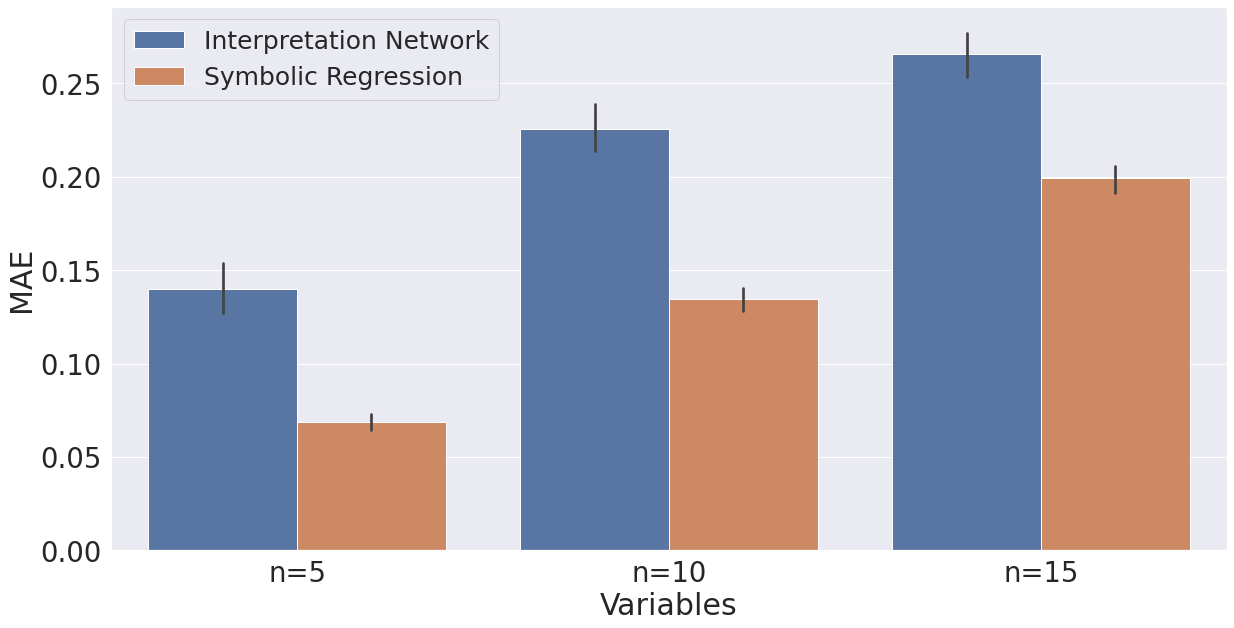

In [22]:
sns.set(rc={'figure.figsize':figsize})
sns.set(font_scale=font_scale)

sns_plot = sns.barplot(x='Variables', 
                 y='MAE', 
                 hue='Approach', 
                 #palette=[color_1, color_2, color_3],
                 data=evaluate_different_variable_numbers_single_lambda_net_df_rows)
plt.legend(fontsize=legend_fontsize, loc = legend_loc)

sns_plot.get_figure().savefig('./evaluation_results/error_barplot_complete_grouped.pdf', bbox_inches = 'tight', pad_inches = 0)


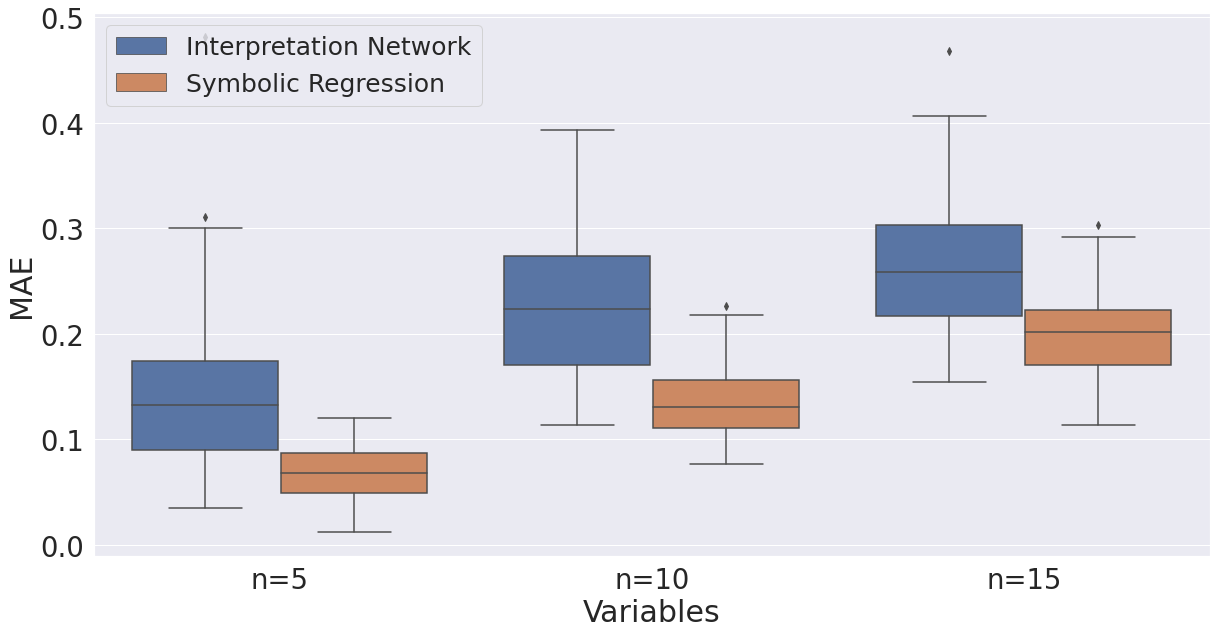

In [23]:
sns.set(rc={'figure.figsize':figsize})
sns.set(font_scale=font_scale)

sns_plot = sns.boxplot(x="Variables", 
            y="MAE",
            hue="Approach", 
            #palette=[color_1, color_2, color_3],
            data=evaluate_different_variable_numbers_single_lambda_net_df_rows)
plt.legend(fontsize=legend_fontsize, loc = legend_loc)

#sns.despine(offset=10, trim=True)
sns_plot.get_figure().savefig('./evaluation_results/error_boxplot_complete_grouped.pdf', bbox_inches = 'tight', pad_inches = 0)


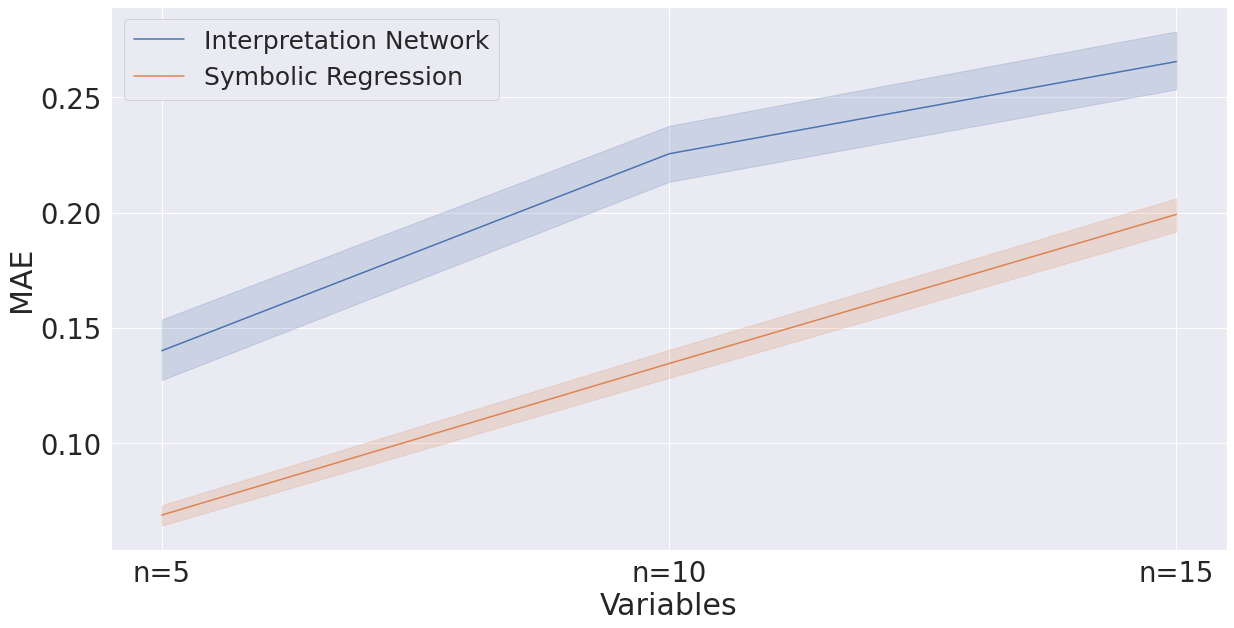

In [24]:
sns.set(rc={'figure.figsize':figsize})
sns.set(font_scale=font_scale)

sns_plot = sns.lineplot(x="Variables", 
            y="MAE",
            hue="Approach", 
            #palette=[color_1, color_2, color_3],
            data=evaluate_different_variable_numbers_single_lambda_net_df_rows)
plt.legend(fontsize=legend_fontsize, loc = legend_loc)

#sns.despine(offset=10, trim=True)
sns_plot.get_figure().savefig('./evaluation_results/error_lineplot_complete_grouped.pdf', bbox_inches = 'tight', pad_inches = 0)


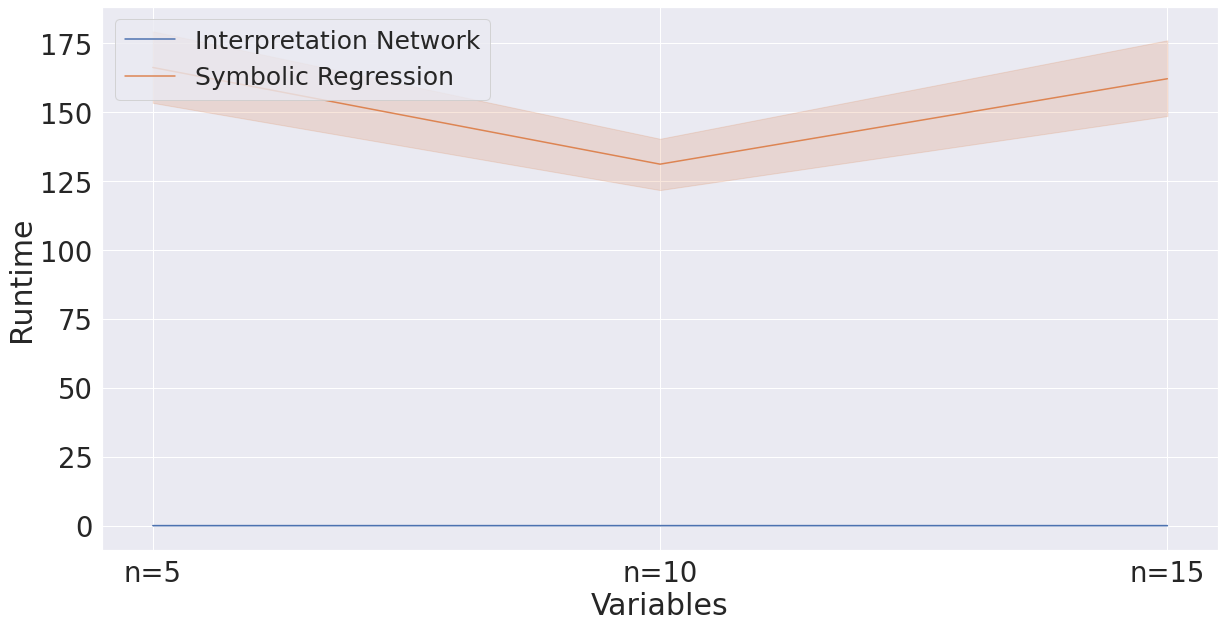

In [25]:
sns.set(rc={'figure.figsize':figsize})
sns.set(font_scale=font_scale)

sns_plot = sns.lineplot(x='Variables', 
                 y='Runtime', 
                 hue='Approach', 
                 #palette=[color_1, color_2, color_3],
                 data=evaluate_runtime_single_lambda_net_df_rows)
plt.legend(fontsize=legend_fontsize, loc = legend_loc)

sns_plot.get_figure().savefig('./evaluation_results/runtime_lineplot_complete.pdf', bbox_inches = 'tight', pad_inches = 0)


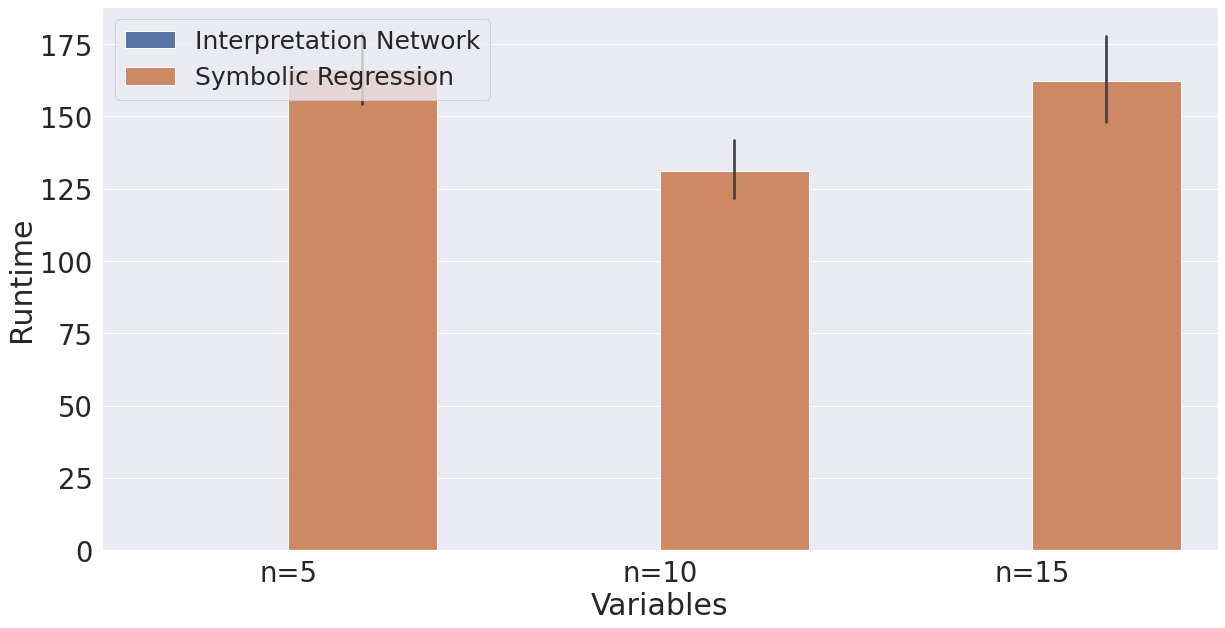

In [26]:
sns.set(rc={'figure.figsize':figsize})
sns.set(font_scale=font_scale)

sns_plot = sns.barplot(x='Variables', 
                 y='Runtime', 
                 hue='Approach', 
                 #palette=[color_1, color_2, color_3],
                 data=evaluate_runtime_single_lambda_net_df_rows)
plt.legend(fontsize=legend_fontsize, loc = legend_loc)

sns_plot.get_figure().savefig('./evaluation_results/runtime_barplot_complete.pdf', bbox_inches = 'tight', pad_inches = 0)


In [27]:
#evaluate_runtime_single_lambda_net_df_rows.loc[evaluate_runtime_single_lambda_net_df_rows['Runtime'] < 1, 'Runtime'] = 
#evaluate_runtime_single_lambda_net_df_rows

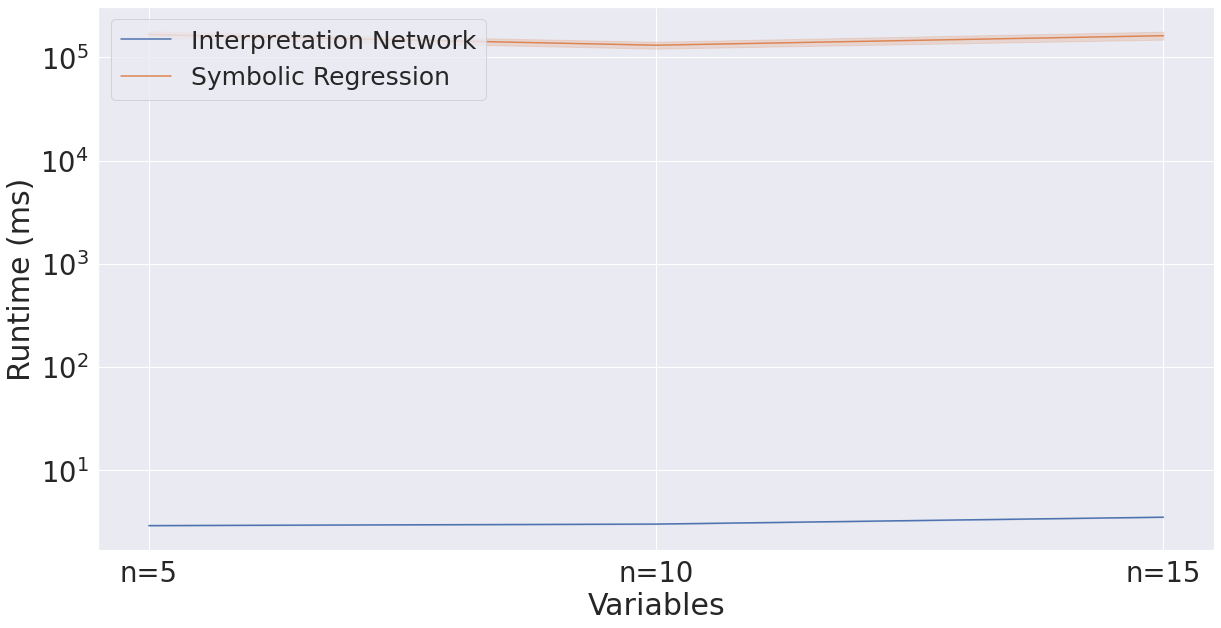

In [28]:
evaluate_runtime_single_lambda_net_df_rows_ms = deepcopy(evaluate_runtime_single_lambda_net_df_rows)
evaluate_runtime_single_lambda_net_df_rows_ms['Runtime'] = evaluate_runtime_single_lambda_net_df_rows_ms['Runtime']*1000

sns.set(rc={'figure.figsize':figsize})
sns.set(font_scale=font_scale)

sns_plot = sns.lineplot(x='Variables', 
                 y='Runtime', 
                 hue='Approach', 
                 #palette=[color_1, color_2, color_3],
                 data=evaluate_runtime_single_lambda_net_df_rows_ms)
plt.legend(fontsize=legend_fontsize, loc = legend_loc)

sns_plot.set_yscale('log')
sns_plot.set(xlabel='Variables', ylabel='Runtime (ms)')
#sns_plot.set_ylim(0.0001, 1e3)
#ticks = [1, 10, 100, 1000]
#sns_plot.set_yticks(ticks)
#sns_plot.set_yticklabels(ticks)

sns_plot.get_figure().savefig('./evaluation_results/runtime_lineplot_complete_log_ms.pdf', bbox_inches = 'tight', pad_inches = 0)


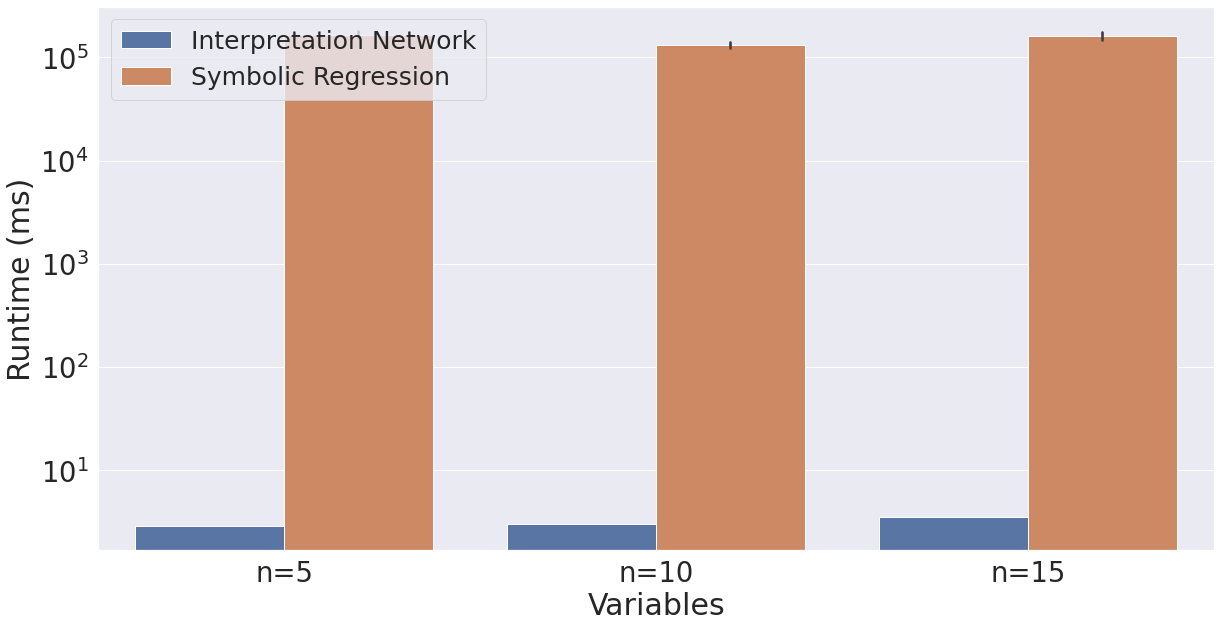

In [29]:
evaluate_runtime_single_lambda_net_df_rows_ms = deepcopy(evaluate_runtime_single_lambda_net_df_rows)
evaluate_runtime_single_lambda_net_df_rows_ms['Runtime'] = evaluate_runtime_single_lambda_net_df_rows_ms['Runtime']*1000

sns.set(rc={'figure.figsize':figsize})
sns.set(font_scale=font_scale)

sns_plot = sns.barplot(x='Variables', 
                 y='Runtime', 
                 hue='Approach', 
                 #palette=[color_1, color_2, color_3],
                 data=evaluate_runtime_single_lambda_net_df_rows_ms)
plt.legend(fontsize=legend_fontsize, loc = legend_loc)

sns_plot.set_yscale('log')
sns_plot.set(xlabel='Variables', ylabel='Runtime (ms)')
#sns_plot.set_ylim(0.0001, 1e3)
#ticks = [1, 10, 100, 1000]
#sns_plot.set_yticks(ticks)
#sns_plot.set_yticklabels(ticks)

sns_plot.get_figure().savefig('./evaluation_results/runtime_barplot_complete_log_ms.pdf', bbox_inches = 'tight', pad_inches = 0)


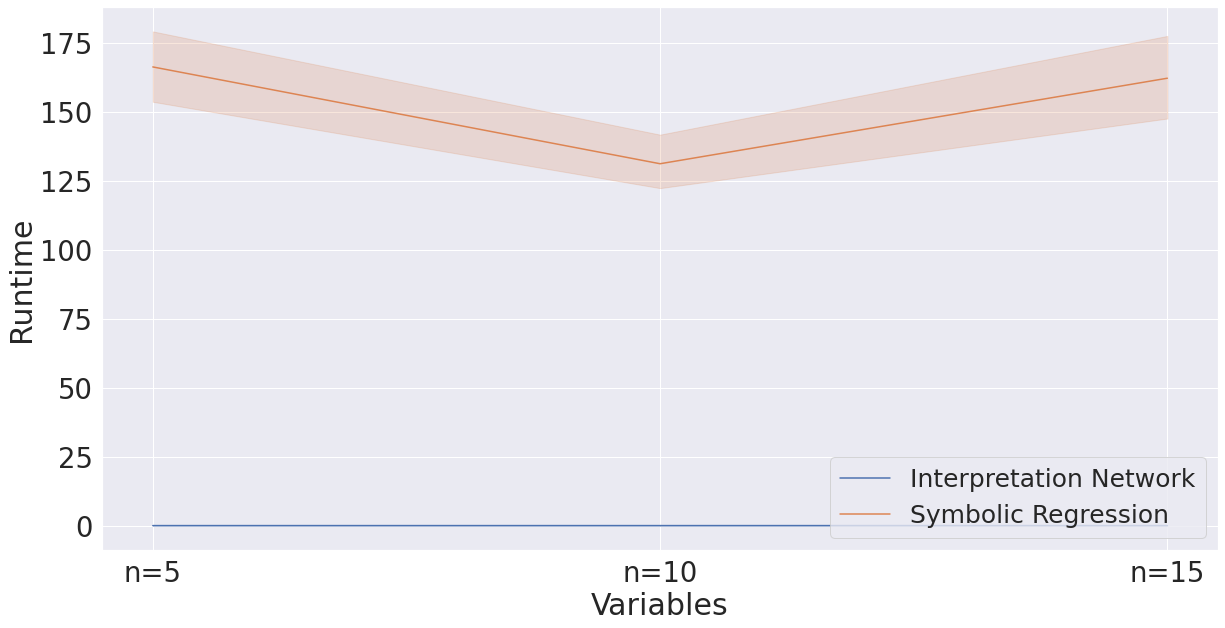

In [30]:
sns.set(rc={'figure.figsize':figsize})
sns.set(font_scale=font_scale)

sns_plot = sns.lineplot(x='Variables', 
                 y='Runtime', 
                 hue='Approach', 
                 #palette=[color_1, color_3],
                 data=evaluate_runtime_single_lambda_net_df_rows[evaluate_runtime_single_lambda_net_df_rows['Approach'] != 'Symbolic Metamodeling'])
plt.legend(fontsize=legend_fontsize, loc = 4)

sns_plot.get_figure().savefig('./evaluation_results/runtime_lineplot_SR.pdf', bbox_inches = 'tight', pad_inches = 0)


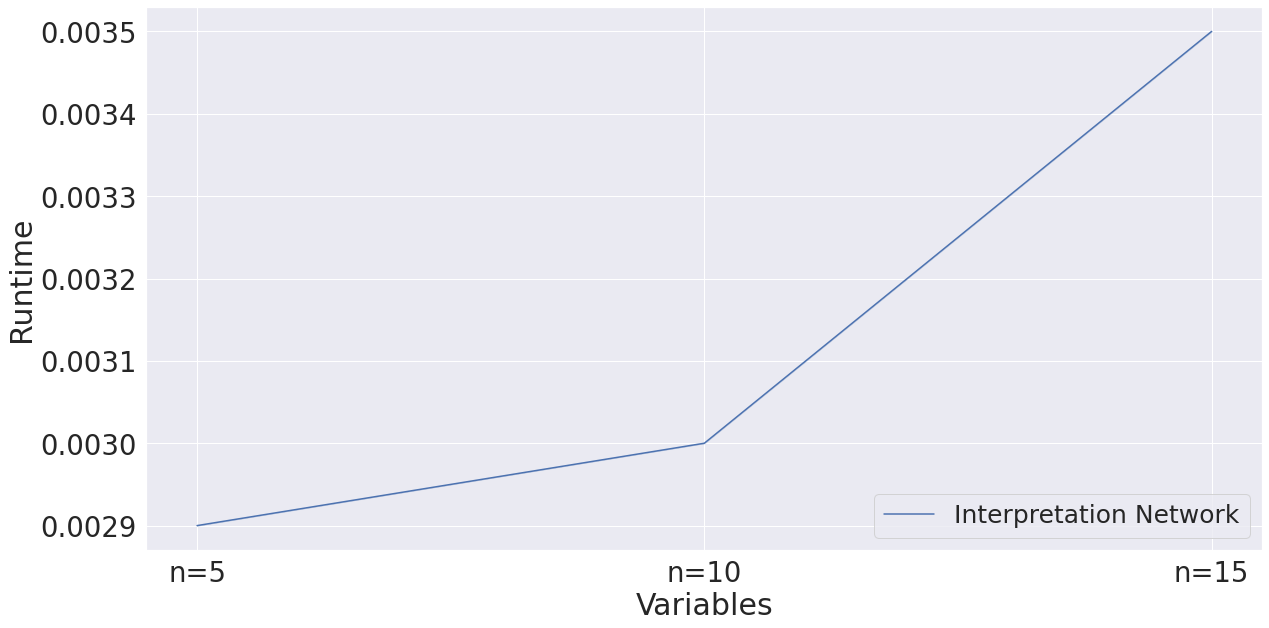

In [31]:
sns.set(rc={'figure.figsize':figsize})
sns.set(font_scale=font_scale)

sns_plot = sns.lineplot(x='Variables', 
                 y='Runtime', 
                 hue='Approach', 
                 #palette=[color_1, color_2],
                 data=evaluate_runtime_single_lambda_net_df_rows[evaluate_runtime_single_lambda_net_df_rows['Approach'] != 'Symbolic Regression'])
plt.legend(fontsize=legend_fontsize, loc = 4)

sns_plot.get_figure().savefig('./evaluation_results/runtime_lineplot_SM.pdf', bbox_inches = 'tight', pad_inches = 0)


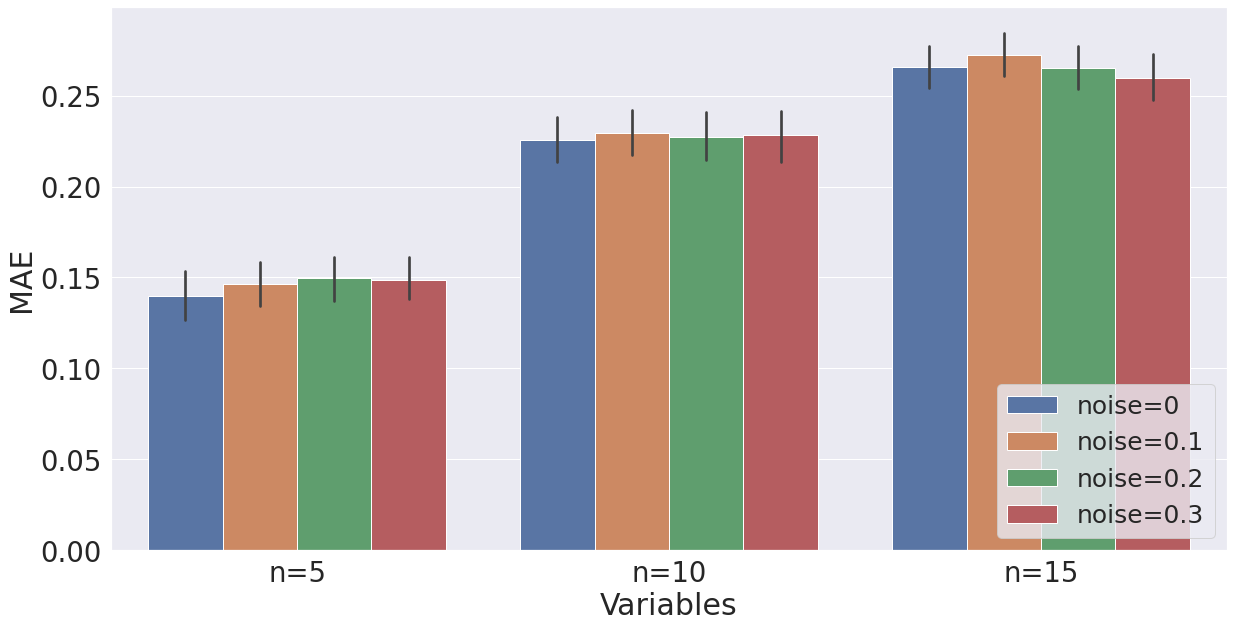

In [32]:
sns.set(rc={'figure.figsize':figsize})
sns.set(font_scale=font_scale)

sns_plot = sns.barplot(x='Variables', 
                 y='MAE', 
                 hue='Noise', 
                 #palette=[color_1, color_2, color_3],
                 data=evaluate_noise_single_lambda_net_df_rows)
plt.legend(fontsize=legend_fontsize, loc = 4)

sns_plot.get_figure().savefig('./evaluation_results/noise_barplot_complete_grouped.pdf', bbox_inches = 'tight', pad_inches = 0)


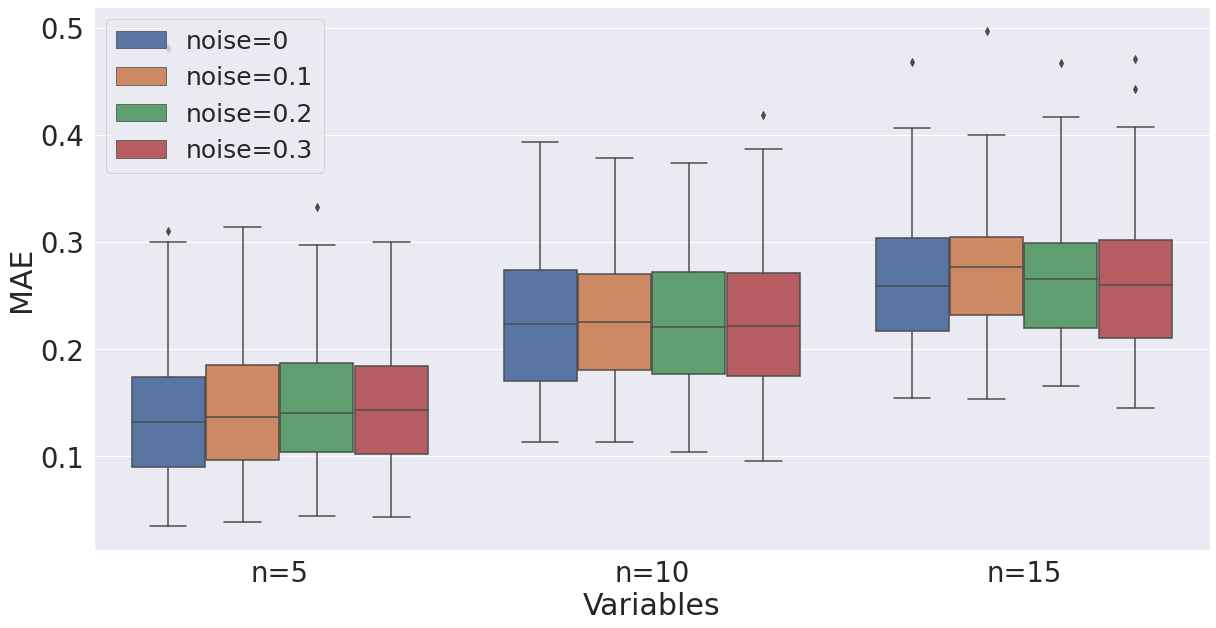

In [33]:
sns.set(rc={'figure.figsize':figsize})
sns.set(font_scale=font_scale)

sns_plot = sns.boxplot(x="Variables", 
            y="MAE",
            hue="Noise", 
            #palette=[color_1, color_2, color_3],
            data=evaluate_noise_single_lambda_net_df_rows)
plt.legend(fontsize=legend_fontsize, loc = legend_loc)

#sns.despine(offset=10, trim=True)
sns_plot.get_figure().savefig('./evaluation_results/noise_boxplot_complete_grouped.pdf', bbox_inches = 'tight', pad_inches = 0)


# Single Lambda Net n=1

In [34]:
def get_sympy_string_from_coefficients(coefficient_array, force_complete_poly_representation=False, round_digits=None):
    
    import sympy as sym
    from sympy.sets.sets import Union  
    from sympy import Symbol, sympify, lambdify, abc, SympifyError
        
    def gen_monomial_identifier_list(variable_list, degree, number_of_variables):

        def get_polynomial(vars, power): 

            if "c" in vars: 
                raise Exception("\"c\" cannot be a variable") 

            vars.append("c") # add dummy variable 

            # compute all combinations of variables 
            terms = [] 
            for x in itertools.combinations_with_replacement(vars, power): 
                terms.append(x) 

            # get rid of "c" terms 
            terms = list(map(list, terms))
            for i in range(len(terms)): 
                while "c" in terms[i]: 
                    terms[i].remove("c") 

            return terms    


        terms = get_polynomial(variable_list, degree) 

        monomial_identifier_list = []
        for term in terms:
            monomial = [0 for i in range(number_of_variables)]
            for value in term:
                index = int(value[1:])
                monomial[index] = monomial[index] + 1
            monomial_identifier_list.append(monomial)    

        return monomial_identifier_list        
        
        
    list_of_monomial_identifiers_extended = []


    variable_list = ['x'+ str(i) for i in range(n)]
    list_of_monomial_identifiers = gen_monomial_identifier_list(variable_list, d, n)
        
    variable_alphabet =  "abcdefghijklmnopqrstuvwxyz"
    
    variable_list = []
    for i in range(n):
        variable_list.append(sym.symbols(variable_alphabet[i]))    

    f = 0

    # Convert output array to monomial identifier index and corresponding coefficient
    coefficients = coefficient_array[:interpretation_net_output_monomials]
    index_array = coefficient_array[interpretation_net_output_monomials:]

    index_list = np.split(index_array, interpretation_net_output_monomials)

    indices = np.argmax(index_list, axis=1)



    for monomial_index, monomial_coefficient in zip(indices, coefficients):
        if round_digits != None:
            subfunction = np.round(monomial_coefficient, round_digits)
        else:
            subfunction = monomial_coefficient
            #REPLACE NAN
        for i, monomial_exponent in enumerate(list_of_monomial_identifiers[monomial_index]):
            subfunction *= variable_list[i]**monomial_exponent
        f += subfunction    
    
    return f

In [35]:
def calculate_function_values_from_sympy(function, data_points, variable_names=None):
    
    import sympy as sym
    from sympy.sets.sets import Union  
    from sympy import Symbol, sympify, lambdify, abc, SympifyError
    
    
    print(function)
    if isinstance(function, str):
        function = sympify(function)
    
    # Function Generation 0 1 import
    
    print(function)
    
    if function is None:
        return np.array([np.nan for i in range(data_points.shape[0])])
    try:
        if variable_names == None:
            function_vars = list(function.atoms(Symbol))
        else:
            function_vars = [sym.symbols(variable_name) for variable_name in variable_names]
        
        print(function_vars)
        #print('function_vars', function_vars)
        lambda_function = lambdify(function_vars, function, modules=["scipy", "numpy"])
        
        print(function_vars)
        #print('lambda_function', lambda_function)
        #print('data_points[0]', data_points[0])
        if len(function_vars) >= 1:
            function_values = [lambda_function(data_point) for data_point in data_points]
            
        else:
            function_values = [lambda_function() for i in range(data_points.shape[0])]
    except (NameError, KeyError, TypeError) as e:
        #print(e)
        function_values = []
        for data_point in data_points:
            function_value = function.evalf(subs={var: data_point[index] for index, var in enumerate(list(function_vars))})
            try:
                function_value = float(function_value)
            except TypeError as te:
                #print(te)
                #print(function_value)
                function_value = np.inf
            function_values.append(function_value)
    function_values = np.nan_to_num(function_values).ravel()
                
    return function_values

In [36]:
def weights_to_pred(weights, x, base_model=None):
    
    import tensorflow as tf
    
    def shape_flat_weights(flat_weights, target_weights):

        from utilities.utility_functions import flatten

        #print('shape_flat_weights')

        shaped_weights =[]
        start = 0
        for el in target_weights:
            target_shape = el.shape
            size = len(list(flatten(el)))
            shaped_el = np.reshape(flat_weights[start:start+size], target_shape)
            shaped_weights.append(shaped_el)
            start += size

        return shaped_weights
    
    def generate_base_model(): #without dropout

        from tensorflow.keras import Sequential
        from tensorflow.keras.layers import Dense, Dropout

        lambda_network_layers = [128]
        n=1

        base_model = Sequential()

        base_model.add(Dense(lambda_network_layers[0], activation='relu', input_dim=n))

        for neurons in lambda_network_layers[1:]:
            base_model.add(Dense(neurons, activation='relu'))

        base_model.add(Dense(1))

        return base_model    


    if base_model is None:
        base_model = generate_base_model()
    else:
        base_model = tf.keras.models.clone_model(base_model)
    base_model_weights = base_model.get_weights()
    
    # Shape weights (flat) into correct model structure
    shaped_weights = shape_flat_weights(weights, base_model_weights)
    
    model = tf.keras.models.clone_model(base_model)
    
    # Make prediction
    model.set_weights(shaped_weights)
    y = model.predict(x).ravel()
    return y

In [37]:
linspace = np.linspace(0, 1, num=200)

target_function = '0.8404*x**5 - 0.5454*x**2 - 0.3712*x'

function_inet = '3.1812*x**4 - 3.1752*x**3 - 0.06934'
function_symbolic_metamodeling = '1/(1.0000*exp(1.47e-8*x**3 + 5.13e-8*x**2 - 6.0e-9*x) + 1)'
function_symbolic_regression = '-0.5060*x'

lambda_net_weights_array = np.array([-4.53873000e-03, -1.11128510e-01,  1.76373400e-01,  1.23474390e-01,
        2.53171560e-01,  2.47580300e-01,  1.53038770e-01, -1.45556140e-01,
        1.06334500e-01,  1.82586060e-01,  2.36667920e-01, -4.31616000e-02,
       -9.23875000e-03,  1.76539110e-01,  2.58970140e-01,  2.29601790e-01,
        3.75495060e-04,  2.93048050e-01,  2.50301480e-01,  2.67959830e-01,
        3.00992220e-01,  7.81934560e-02,  4.83490040e-02, -2.06309700e-02,
       -1.97959940e-01, -4.41582500e-02,  8.44239300e-02, -1.42727550e-01,
       -1.02321260e-01, -1.14229925e-01,  2.31609780e-01,  1.40377880e-01,
        2.41107700e-01,  1.97220730e-01, -4.02931570e-02, -1.67625590e-01,
       -1.49312880e-01, -7.71625340e-03, -1.08034080e-01, -1.28879790e-01,
        2.61870270e-01,  9.95685900e-02,  2.22194720e-01, -9.69414800e-02,
        2.06357910e-01,  1.04952310e-01,  4.82889940e-02,  2.42509230e-01,
        2.37940820e-01, -1.98270770e-01, -1.92469800e-02,  1.09788020e-01,
       -1.89818100e-01, -4.33666700e-02, -1.61650750e-01,  2.45775550e-01,
        2.39916760e-01, -2.02352580e-01, -2.37135740e-02, -1.17070450e-01,
        1.07872410e-01,  1.46214080e-01,  1.91722800e-01,  2.57536440e-01,
        1.82289960e-01, -5.74724970e-02, -1.56003030e-01,  1.73903960e-01,
        6.59063460e-02, -1.14981560e-01,  2.10338230e-01, -2.13131590e-01,
       -6.37859100e-03,  1.75213870e-01,  7.55454130e-03,  1.56091360e-01,
        1.82839330e-01, -1.91604140e-01,  1.54709800e-01,  2.37633700e-01,
       -5.60473350e-02,  1.16027130e-01,  2.30423060e-01, -2.02965000e-02,
        1.49858400e-01, -8.46379700e-02,  2.93622900e-01, -1.96724820e-01,
       -6.70411140e-02,  1.40309150e-01,  1.24475986e-01, -1.96272180e-01,
       -1.07128750e-01,  5.57046570e-02, -6.11317160e-02, -1.91529630e-01,
        9.94647700e-02, -1.84959440e-01,  1.48367670e-01, -1.25007900e-01,
       -1.57284780e-01,  8.02758600e-02,  6.19940240e-02, -2.15316980e-01,
        2.18273600e-01, -6.67286800e-02, -1.29204180e-01,  2.18539480e-01,
       -1.09468250e-02, -2.08183110e-01, -2.11151350e-01, -2.02995270e-01,
        6.76564050e-02, -4.12614800e-02,  1.44623380e-01, -1.44367400e-01,
        7.07277950e-02,  2.28997140e-01,  3.46961240e-02, -2.61413980e-03,
        1.08759990e-01,  1.72500160e-01,  2.27782620e-01, -8.14614300e-02,
        2.41957250e-01, -2.28735500e-02, -9.31668800e-02,  1.75517290e-01,
        0.00000000e+00,  0.00000000e+00, -2.83552620e-04, -8.68576100e-03,
       -1.89842920e-01, -2.06788990e-01, -1.36465235e-02,  0.00000000e+00,
       -1.31309265e-02, -3.12853870e-02, -3.54857700e-04,  0.00000000e+00,
        0.00000000e+00, -9.07143950e-03, -1.99813570e-01, -2.81839370e-04,
       -1.52318930e-02, -2.49700190e-01, -1.49108750e-01, -1.95219490e-01,
       -2.77274940e-01, -2.08110000e-02, -1.53364020e-02,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -2.02396000e-02,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -1.56189200e-01, -3.08590550e-02,
       -1.68653220e-01, -6.30193500e-04,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -2.43033860e-01, -3.17260770e-02, -1.72904840e-02,  0.00000000e+00,
       -1.88926010e-02, -1.44494950e-02, -1.58055600e-02, -3.01752360e-04,
       -1.30871740e-01,  0.00000000e+00,  0.00000000e+00, -2.98302000e-02,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -2.46891300e-04,
       -4.31677470e-04,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -2.57178020e-02, -2.15557250e-02, -2.77823680e-04, -2.27864010e-01,
       -2.68451580e-04,  0.00000000e+00,  0.00000000e+00, -3.93084400e-02,
       -1.87052190e-02,  0.00000000e+00, -3.70231680e-02,  0.00000000e+00,
        0.00000000e+00, -3.53689700e-02, -1.66320170e-02, -3.25034000e-02,
       -3.99362600e-02,  0.00000000e+00, -1.97953770e-02, -2.76854750e-02,
        0.00000000e+00, -3.38594080e-03, -1.46701500e-01,  0.00000000e+00,
       -2.47155690e-02,  0.00000000e+00, -2.40219070e-01,  0.00000000e+00,
        0.00000000e+00, -2.60679370e-02, -4.40913140e-04,  0.00000000e+00,
        0.00000000e+00, -1.73933190e-02,  0.00000000e+00,  0.00000000e+00,
       -1.49289740e-02,  0.00000000e+00, -2.26376490e-02,  0.00000000e+00,
        0.00000000e+00, -2.43455410e-02, -1.85047840e-02,  0.00000000e+00,
       -1.75265850e-01,  0.00000000e+00,  0.00000000e+00, -6.91055840e-04,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -2.25096120e-02,  0.00000000e+00, -1.28028760e-03,  0.00000000e+00,
       -2.23593280e-02, -1.13100610e-01, -1.09613035e-02, -1.21215600e-02,
       -2.25458740e-02, -1.34141170e-02, -1.99031980e-01,  0.00000000e+00,
       -7.52854400e-04,  0.00000000e+00,  0.00000000e+00, -3.53752260e-02,
       -1.24589860e-01, -1.75839990e-01, -1.73520040e-01, -1.66342940e-01,
        5.39303200e-01,  6.89242300e-01, -9.41487200e-02, -1.99890910e-01,
       -1.75872030e-01, -4.36887800e-02, -1.10768980e-01, -1.72684940e-01,
       -1.78400640e-01, -1.04050726e-01,  6.49207000e-01, -1.48177180e-01,
        1.89499020e-01,  4.76492970e-01,  3.98006560e-01,  4.18706270e-01,
        9.33719460e-01, -1.90481230e-01, -3.90277540e-02, -1.27790510e-01,
       -1.87736060e-01, -2.89364760e-02, -2.05619510e-01,  7.07380200e-02,
       -1.26499350e-01, -1.54202800e-01,  5.61690800e-01,  4.69274450e-03,
        5.28223300e-01, -1.24712630e-01,  1.92784490e-01, -7.95234600e-02,
       -1.41282530e-01, -2.09587560e-01,  1.63711100e-01, -6.15072250e-02,
        7.16869400e-01, -1.60046310e-02, -5.80260570e-02,  7.11253300e-03,
       -6.09644000e-02, -1.60425860e-01, -1.58229430e-02, -1.28473900e-01,
        3.83847680e-01, -3.31990270e-02,  2.37604680e-02, -2.91566140e-02,
        1.13938840e-01,  5.40822740e-02,  1.20442420e-01, -2.04539690e-01,
       -9.72186700e-02, -2.13801410e-01,  1.02448970e-01,  1.36550370e-01,
       -7.05322100e-02,  3.73663200e-02, -1.72009130e-01,  7.84062600e-01,
       -2.00772100e-01, -4.47842780e-02,  1.32686760e-01, -1.89967030e-02,
       -1.67728130e-01,  1.10957950e-01, -3.27918380e-02,  7.03213500e-02,
       -6.97951900e-02, -1.65489040e-02,  2.04628950e-02, -3.84338900e-02,
       -2.17670090e-02,  1.11113040e-01,  2.30996630e-02, -5.15927300e-02,
        6.92071300e-02, -2.11081800e-01,  5.60633300e-01,  1.89637570e-01,
       -7.58449200e-02,  1.96138080e-01,  4.42441820e-01, -5.83195240e-02,
        1.01640370e-01, -7.54908700e-02, -2.27507770e-01, -1.81976750e-01,
       -1.90250840e-01, -7.06290300e-02,  5.06777760e-02, -1.89435850e-01,
       -1.76667020e-01, -1.54464245e-02,  1.66814350e-02,  1.99261960e-01,
       -1.12706650e-01, -4.30083950e-02, -1.54101610e-01, -1.96271400e-01,
        9.02760860e-01,  8.10205040e-02, -1.52103570e-01, -1.15843450e-01,
       -1.78376530e-01,  9.39188300e-02, -4.81465460e-02,  6.86930400e-02,
       -1.09932100e-02, -1.14525480e-01, -1.83583470e-01, -5.59172930e-02,
       -3.26962360e-02,  2.66098000e-01, -8.19088300e-02,  7.80187700e-02,
       -1.05513480e-01,  6.34165260e-02,  8.88406340e-01,  2.15253530e-01,
       -9.34836040e-02, -1.30761800e-01, -1.24484460e-01, -3.36891400e-02,
       -3.80646260e-04])

function_values_target_function_linspace = calculate_function_values_from_sympy(target_function, linspace)
function_values_inet_linspace = calculate_function_values_from_sympy(function_inet, linspace)
function_values_lambda_net_linspace = weights_to_pred(lambda_net_weights_array, linspace)
function_values_symbolic_metamodeling_linspace = calculate_function_values_from_sympy(function_symbolic_metamodeling, linspace)
function_values_symbolic_regression_linepace = calculate_function_values_from_sympy(function_symbolic_regression, linspace)



0.8404*x**5 - 0.5454*x**2 - 0.3712*x
0.8404*x**5 - 0.5454*x**2 - 0.3712*x
[x]
[x]
3.1812*x**4 - 3.1752*x**3 - 0.06934
3.1812*x**4 - 3.1752*x**3 - 0.06934
[x]
[x]


2021-12-20 19:07:20.774719: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-12-20 19:07:22.962733: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-11.4/lib64:
2021-12-20 19:07:22.962766: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2021-12-20 19:07:22.962793: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (dws-05): /proc/driver/nvidia/version does not exist
2021-12-20 19:07:22.963003: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them i

ImportError: cannot import name 'flatten' from 'utilities.utility_functions' (/work-ceph/smarton/InES_XAI/03_decision_trees/utilities/utility_functions.py)

In [ ]:
function_values_inet_linspace.shape

In [ ]:
function_values_df = pd.DataFrame(data=np.vstack([
                                                 function_values_target_function_linspace,
                                                 function_values_inet_linspace,
                                                 function_values_lambda_net_linspace,
                                                 function_values_symbolic_regression_linepace
                                                 #function_values_symbolic_metamodeling_linspace,
                                                ]).T, columns=[
                                                              'Target Polynomial', 
                                                              'Interpretation-Net Polynomial',
                                                              'Lambda-Net Predictions',
                                                              'Symbolic Regression Polynomial',
                                                              #'Symbolic Metamodeling Function'
                                                              ])

function_values_df.head()


In [ ]:
approach_identifier = np.hstack([
                              np.array(['Target Polynomial' for i in range(linspace.shape[0])]),
                              np.array(['Lambda-Net Predictions' for i in range(linspace.shape[0])]),
                              np.array(['Interpretation-Net Polynomial' for i in range(linspace.shape[0])]),
                              np.array(['Symbolic Regression Polynomial' for i in range(linspace.shape[0])]),
                              #np.array(['Symbolic Metamodeling Function' for i in range(linspace.shape[0])])
                                ])


variable_values_complete = np.hstack([
                                      linspace, 
                                      linspace, 
                                      linspace, 
                                      linspace, 
                                      #linspace
                                     ])

function_values_complete = np.hstack([
                                     function_values_target_function_linspace,
                                     function_values_lambda_net_linspace,
                                     function_values_inet_linspace,
                                     function_values_symbolic_regression_linepace
                                     #function_values_symbolic_metamodeling_linspace,
                                     ])


In [ ]:
function_values_df_sb = pd.DataFrame(data=np.vstack([function_values_complete,
                                                   variable_values_complete,
                                                   approach_identifier]).T, columns=['Function Values', 'Variable Values', 'Approach'])

function_values_df_sb['Function Values'] = function_values_df_sb['Function Values'].astype(float)
function_values_df_sb['Variable Values'] = function_values_df_sb['Variable Values'].astype(float)


function_values_df_sb.head()


In [ ]:
sns.set(rc={'figure.figsize':figsize})
sns.set(font_scale=font_scale)

sns_plot = sns.lineplot(x='Variable Values', 
                 y='Function Values', 
                 hue='Approach', 
                 linewidth = 3,
                  #palette=[color_1, color_2, color_3],
                 data=function_values_df_sb)

#sns_plot.lines[0].set_dashes([15, 3])
sns_plot.lines[1].set_dashes([12, 6])
sns_plot.lines[2].set_dashes([9, 4.5])
sns_plot.lines[3].set_dashes([6, 3])
#sns_plot.lines[4].set_dashes([3, 1.5])



#plt.xticks([0, 1], [0, 1])
#plt.yticks([-5, 5], [-5, 5])

plt.legend(fontsize=legend_fontsize, loc = 3)

sns_plot.get_figure().savefig('./evaluation_results/single_comparison_lineplot_complete.pdf', bbox_inches = 'tight', pad_inches = 0)


In [ ]:
alphabet_abc = 'abcdefghijklmnopqrstuvwxyz'
alphabet_abc = alphabet_abc[:15]
alphabet_xxx = ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14']

alphabet_latex = ['x_0', 'x_1', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6', 'x_7', 'x_8', 'x_9', 'x_10', 'x_11', 'x_12', 'x_13', 'x_14']

In [ ]:
target_function_n5 = '-0.0749x_0x_1x_4 + 0.5084x_1x_2 - 0.2185x_1x_4 - 0.432x_2x_4^2 + 0.0939x_3^2x_4'

function_inet_n5 = '-0.0450x_0x_4^2 + 0.0977x_1^2x_3 + 0.3001x_1x_2^2 - 0.4359x_1x_4^2 + 0.0723x_1'
function_symbolic_metamodeling_n5 = '\frac{1}{0.9981*\exp(-0.0037x_0^3x_1^3 + 0.0029x_0^3x_2^3 - 0.0003x_0^3x_3^3 - 0.0024x_0^3x_4^3 - 0.0011x_0^3 + 0.0017x_0^2x_1^2 - 0.0014x_0^2x_2^2 + 0.0001x_0^2x_3^2 + 0.0008x_0^2x_4^2 - 0.0096x_0^2 + 0.039x_0x_1 - 0.0304x_0x_2 + 0.0031x_0x_3 + 0.0277x_0x_4 + 0.001x_0 + 0.0529x_1^3x_2^3 - 0.0008x_1^3x_3^3 - 0.0215x_1^3x_4^3 - 0.0014x_1^3 - 0.0304x_1^2x_2^2 + 0.0004x_1^2x_3^2 + 0.0079x_1^2x_4^2 - 0.013x_1^2 - 0.5369x_1x_2 + 0.0082x_1x_3 + 0.2408x_1x_4 + 0.0013x_1 + 0.0018x_2^3x_3^3 - 0.0349x_2^3x_4^3 - 0.0022x_2^3 - 0.0009x_2^2x_3^2 + 0.012x_2^2x_4^2 - 0.0206x_2^2 - 0.0185x_2x_3 + 0.3958x_2x_4 + 0.0021x_2 + 0.0076x_3^3x_4^3 - 0.0014x_3^3 - 0.0029x_3^2x_4^2 - 0.013x_3^2 - 0.0853x_3x_4 + 0.0013x_3 + 0.0026x_4^3 + 0.023x_4^2 - 0.0024x_4)} + 1)'
function_symbolic_regression_n5 = '0.218x_2^2 + 0.436x_1x_2 - 0.654x_4x_2'


lambda_net_n5_mae = 0.0068838745

function_inet_n5_mae = 0.039138634
function_symbolic_metamodeling_n5_mae = 0.49163458
function_symbolic_regression_n5_mae = 0.037264857

In [ ]:
target_function_n10 = '-0.5453x_1^2x_6 - 0.2647x_1x_2x_5 + 0.2302x_2x_5x_9 + 0.1848x_2x_6 - 0.1119x_3x_5x_6 - 0.5589x_4^3 + 0.5255x_4^2x_8 - 0.716x_5^2x_9 - 0.4782x_6x_7x_8 - 0.5875x_6x_8'

function_inet_n10 = '0.1837x_0^2x_3 - 0.2915x_0x_3x_4 - 0.4966x_0x_5x_6 - 0.3588x_1^2 + 0.0340x_1x_3x_8 - 0.1769x_2x_3 + 0.1238x_3^2 - 0.0746x_3x_6x_7 - 0.3337x_6^2 - 0.3666x_6x_8'
function_symbolic_metamodeling_n10 = '\frac{1}{0.8988*\exp(-0.0002x_0^3x_1^3 - 0.0009x_0^3x_2^3 + 0.0014x_0^3x_3^3 - 0.0121x_0^3x_4^3 + 0.0012x_0^3x_5^3 + 0.0044x_0^3x_6^3 + 0.0022x_0^3x_7^3 - 0.0014x_0^3x_8^3 + 0.0011x_0^3x_9^3 + 0.0001x_0^2x_1^2 + 0.0004x_0^2x_2^2 - 0.0006x_0^2x_3^2 + 0.0042x_0^2x_4^2 - 0.0003x_0^2x_5^2 - 0.0013x_0^2x_6^2 - 0.0009x_0^2x_7^2 + 0.0005x_0^2x_8^2 - 0.0004x_0^2x_9^2 + 0.0022x_0x_1 + 0.0097x_0x_2 - 0.0151x_0x_3 + 0.1371x_0x_4 - 0.0133x_0x_5 - 0.0508x_0x_6 - 0.0245x_0x_7 + 0.0156x_0x_8 - 0.012x_0x_9 - 0.0076x_1^3x_2^3 + 0.002x_1^3x_3^3 - 0.0124x_1^3x_4^3 - 0.0087x_1^3x_5^3 - 0.0408x_1^3x_6^3 + 0.0031x_1^3x_7^3 - 0.0003x_1^3x_8^3 + 0.0029x_1^3x_9^3 + 0.0027x_1^2x_2^2 - 0.0007x_1^2x_3^2 + 0.0029x_1^2x_4^2 + 0.0017x_1^2x_5^2 + 0.0056x_1^2x_6^2 - 0.001x_1^2x_7^2 + 0.0001x_1^2x_8^2 - 0.0009x_1^2x_9^2 + 0.0862x_1x_2 - 0.0224x_1x_3 + 0.147x_1x_4 + 0.105x_1x_5 + 0.5063x_1x_6 - 0.0358x_1x_7 + 0.0041x_1x_8 - 0.034x_1x_9 + 0.0002x_2^3x_3^3 - 0.0106x_2^3x_4^3 - 0.0028x_2^3x_5^3 + 0.021x_2^3x_6^3 + 0.0009x_2^3x_7^3 - 0.0001x_2^3x_8^3 + 0.0113x_2^3x_9^3 - 0.e-4x_2^2x_3^2 + 0.0038x_2^2x_4^2 + 0.0009x_2^2x_5^2 - 0.0069x_2^2x_6^2 - 0.0004x_2^2x_7^2 - 0.0046x_2^2x_9^2 - 0.002x_2x_3 + 0.1191x_2x_4 + 0.0317x_2x_5 - 0.239x_2x_6 - 0.01x_2x_7 + 0.0014x_2x_8 - 0.1238x_2x_9 - 0.0129x_3^3x_4^3 - 0.0024x_3^3x_5^3 - 0.0004x_3^3x_6^3 + 0.0029x_3^3x_7^3 + 0.0001x_3^3x_8^3 + 0.0013x_3^3x_9^3 + 0.0044x_3^2x_4^2 + 0.0007x_3^2x_5^2 + 0.0001x_3^2x_6^2 - 0.0012x_3^2x_7^2 - 0.0005x_3^2x_9^2 + 0.1466x_3x_4 + 0.0279x_3x_5 + 0.0051x_3x_6 - 0.032x_3x_7 - 0.0006x_3x_8 - 0.015x_3x_9 - 0.012x_4^3x_5^3 - 0.0053x_4^3x_6^3 - 0.0058x_4^3x_7^3 + 0.0377x_4^3x_8^3 - 0.0114x_4^3x_9^3 + 0.0021x_4^2x_5^2 + 0.0008x_4^2x_6^2 + 0.0018x_4^2x_7^2 - 0.0118x_4^2x_8^2 + 0.0035x_4^2x_9^2 + 0.1463x_4x_5 + 0.0651x_4x_6 + 0.0672x_4x_7 - 0.4337x_4x_8 + 0.1312x_4x_9 + 0.0017x_5^3x_7^3 - 0.0021x_5^3x_8^3 - 0.0481x_5^3x_9^3 - 0.0005x_5^2x_7^2 + 0.0004x_5^2x_8^2 + 0.009x_5^2x_9^2 - 0.0003x_5x_6 - 0.0202x_5x_7 + 0.0247x_5x_8 + 0.5849x_5x_9 - 0.0147x_6^3x_7^3 - 0.0603x_6^3x_8^3 + 0.0042x_6^3x_9^3 + 0.0032x_6^2x_7^2 + 0.0044x_6^2x_8^2 - 0.001x_6^2x_9^2 + 0.1757x_6x_7 + 0.7692x_6x_8 - 0.0501x_6x_9 - 0.0183x_7^3x_8^3 + 0.0023x_7^3x_9^3 + 0.0054x_7^2x_8^2 - 0.0008x_7^2x_9^2 + 0.2122x_7x_8 - 0.0259x_7x_9 + 0.0019x_8^3x_9^3 - 0.0006x_8^2x_9^2 - 0.0224x_8x_9)} + 1)'
function_symbolic_regression_n10 = '-1x_1x_5x_9 - 0.643x_6'


lambda_net_n10_mae = 0.01723527

function_inet_n10_mae = 0.1436326
function_symbolic_metamodeling_n10_mae = 0.83080393
function_symbolic_regression_n10_mae = 0.13706042 

In [ ]:
target_function_n15 = '0.4247x_0x_4x_13 - 0.0071x_1x_2x_9 + 0.4567x_1x_2x_14 + 0.3305x_1x_5x_14 + 0.7509x_3^2x_8 - 0.0932x_3^2 + 0.2249x_3x_4x_7 + 0.1848x_3x_10x_12 - 0.4626x_4x_11x_13 - 0.6426x_4x_12^2 - 0.132x_5x_6x_7 + 0.9694x_5x_7x_11 + 0.5357x_5x_7x_12 - 0.1638x_5x_7x_14 + 0.7456x_8x_13x_14'

function_inet_n15 = '0.0722x_0^3 + 0.6574x_0x_2x_8 + 0.0555x_0x_7x_13 + 0.0764x_0x_10 + 0.1436x_1^2x_3 - 0.0359x_2x_3 - 0.1764x_2x_9x_13 + 0.2182x_2x_13x_14 + 0.5176x_3^2x_11 + 0.0369x_4 + 0.1653x_6x_7x_12 - 0.0552x_6x_12x_14 + 0.2252x_7x_8x_9 + 0.2166x_9x_10x_14 + 0.1979x_9x_11x_14'
function_symbolic_metamodeling_n15 = '\frac{1}{1.229*\exp(0.0005x_0^3x_1^3 - 0.0014x_0^3x_10^3 - 0.0015x_0^3x_11^3 - 0.0029x_0^3x_12^3 + 0.018x_0^3x_13^3 - 0.0015x_0^3x_14^3 - 0.0017x_0^3x_2^3 - 0.0018x_0^3x_3^3 + 0.0192x_0^3x_4^3 - 0.004x_0^3x_5^3 + 0.002x_0^3x_6^3 - 0.0035x_0^3x_7^3 - 0.0058x_0^3x_8^3 - 0.0003x_0^3x_9^3 - 0.017x_0^3 - 0.0003x_0^2x_1^2 + 0.0006x_0^2x_10^2 + 0.0007x_0^2x_11^2 + 0.001x_0^2x_12^2 - 0.0093x_0^2x_13^2 + 0.0008x_0^2x_14^2 + 0.0008x_0^2x_2^2 + 0.001x_0^2x_3^2 - 0.0083x_0^2x_4^2 + 0.0021x_0^2x_5^2 - 0.0009x_0^2x_6^2 + 0.0019x_0^2x_7^2 + 0.0033x_0^2x_8^2 + 0.0001x_0^2x_9^2 + 0.0314x_0^2 - 0.0055x_0x_1 + 0.015x_0x_10 + 0.0158x_0x_11 + 0.0323x_0x_12 - 0.1871x_0x_13 + 0.0153x_0x_14 + 0.0185x_0x_2 + 0.0187x_0x_3 - 0.2085x_0x_4 + 0.0409x_0x_5 - 0.0223x_0x_6 + 0.0365x_0x_7 + 0.0591x_0x_8 + 0.003x_0x_9 - 0.0147x_0 + 0.001x_1^3x_10^3 - 0.0039x_1^3x_11^3 - 0.0031x_1^3x_12^3 - 0.0016x_1^3x_13^3 + 0.0316x_1^3x_14^3 + 0.0163x_1^3x_2^3 - 0.001x_1^3x_3^3 + 0.0004x_1^3x_4^3 + 0.0092x_1^3x_5^3 - 0.0041x_1^3x_7^3 - 0.0021x_1^3x_8^3 - 0.0024x_1^3x_9^3 + 0.036x_1^3 - 0.0005x_1^2x_10^2 + 0.002x_1^2x_11^2 + 0.0013x_1^2x_12^2 + 0.0009x_1^2x_13^2 - 0.0191x_1^2x_14^2 - 0.0086x_1^2x_2^2 + 0.0006x_1^2x_3^2 - 0.0002x_1^2x_4^2 - 0.0054x_1^2x_5^2 + 0.0023x_1^2x_7^2 + 0.0012x_1^2x_8^2 + 0.0012x_1^2x_9^2 - 0.0678x_1^2 - 0.0107x_1x_10 + 0.0407x_1x_11 + 0.0342x_1x_12 + 0.0166x_1x_13 - 0.3159x_1x_14 - 0.169x_1x_2 + 0.0097x_1x_3 - 0.0046x_1x_4 - 0.0928x_1x_5 - 0.0003x_1x_6 + 0.0412x_1x_7 + 0.0209x_1x_8 + 0.0259x_1x_9 + 0.0342x_1 + 0.0005x_10^3x_11^3 + 0.0046x_10^3x_12^3 - 0.0025x_10^3x_13^3 - 0.0003x_10^3x_14^3 - 0.0006x_10^3x_2^3 + 0.0063x_10^3x_3^3 + 0.0027x_10^3x_4^3 - 0.0033x_10^3x_5^3 + 0.0029x_10^3x_6^3 - 0.0052x_10^3x_7^3 - 0.0025x_10^3x_8^3 + 0.0021x_10^3x_9^3 - 0.0099x_10^3 - 0.0002x_10^2x_11^2 - 0.0016x_10^2x_12^2 + 0.0012x_10^2x_13^2 + 0.0002x_10^2x_14^2 + 0.0003x_10^2x_2^2 - 0.0034x_10^2x_3^2 - 0.001x_10^2x_4^2 + 0.0018x_10^2x_5^2 - 0.0012x_10^2x_6^2 + 0.0027x_10^2x_7^2 + 0.0014x_10^2x_8^2 - 0.0009x_10^2x_9^2 + 0.0179x_10^2 - 0.0049x_10x_11 - 0.0518x_10x_12 + 0.027x_10x_13 + 0.0036x_10x_14 + 0.0063x_10x_2 - 0.0647x_10x_3 - 0.0304x_10x_4 + 0.0343x_10x_5 - 0.0314x_10x_6 + 0.0539x_10x_7 + 0.0263x_10x_8 - 0.0232x_10x_9 - 0.0072x_10 - 0.0013x_11^3x_12^3 - 0.0247x_11^3x_13^3 - 0.0049x_11^3x_14^3 + 0.0013x_11^3x_2^3 - 0.0013x_11^3x_3^3 - 0.0199x_11^3x_4^3 + 0.0448x_11^3x_5^3 - 0.0017x_11^3x_6^3 + 0.041x_11^3x_7^3 - 0.0034x_11^3x_8^3 + 0.0023x_11^3x_9^3 + 0.015x_11^3 + 0.0005x_11^2x_12^2 + 0.0118x_11^2x_13^2 + 0.0027x_11^2x_14^2 - 0.0007x_11^2x_2^2 + 0.0007x_11^2x_3^2 + 0.008x_11^2x_4^2 - 0.0275x_11^2x_5^2 + 0.0008x_11^2x_6^2 - 0.0244x_11^2x_7^2 + 0.0019x_11^2x_8^2 - 0.001x_11^2x_9^2 - 0.0284x_11^2 + 0.0145x_11x_12 + 0.2623x_11x_13 + 0.0499x_11x_14 - 0.014x_11x_2 + 0.0132x_11x_3 + 0.22x_11x_4 - 0.4448x_11x_5 + 0.0182x_11x_6 - 0.4116x_11x_7 + 0.035x_11x_8 - 0.0242x_11x_9 + 0.0149x_11 - 0.0025x_12^3x_13^3 - 0.0071x_12^3x_14^3 + 0.0005x_12^3x_2^3 + 0.0054x_12^3x_3^3 - 0.0567x_12^3x_4^3 + 0.022x_12^3x_5^3 - 0.0021x_12^3x_6^3 + 0.0179x_12^3x_7^3 - 0.0048x_12^3x_8^3 - 0.0008x_12^3x_9^3 - 0.1593x_12^3 + 0.001x_12^2x_13^2 + 0.0032x_12^2x_14^2 - 0.0002x_12^2x_2^2 - 0.0024x_12^2x_3^2 + 0.0106x_12^2x_4^2 - 0.0105x_12^2x_5^2 + 0.0007x_12^2x_6^2 - 0.0082x_12^2x_7^2 + 0.0023x_12^2x_8^2 + 0.0003x_12^2x_9^2 + 0.1787x_12^2 + 0.0281x_12x_13 + 0.0772x_12x_14 - 0.0053x_12x_2 - 0.0582x_12x_3 + 0.6893x_12x_4 - 0.234x_12x_5 + 0.0238x_12x_6 - 0.1917x_12x_7 + 0.0516x_12x_8 + 0.0093x_12x_9 + 0.1567x_12 + 0.0319x_13^3x_14^3 - 0.0012x_13^3x_2^3 - 0.0044x_13^3x_3^3 - 0.0005x_13^3x_4^3 - 0.0039x_13^3x_5^3 + 0.0027x_13^3x_6^3 - 0.0057x_13^3x_7^3 + 0.0321x_13^3x_8^3 - 0.001x_13^3x_9^3 + 0.0156x_13^3 - 0.0188x_13^2x_14^2 + 0.0006x_13^2x_2^2 + 0.0025x_13^2x_3^2 + 0.0002x_13^2x_4^2 + 0.0022x_13^2x_5^2 - 0.0013x_13^2x_6^2 + 0.0031x_13^2x_7^2 - 0.0197x_13^2x_8^2 + 0.0005x_13^2x_9^2 - 0.0291x_13^2 - 0.3211x_13x_14 + 0.0124x_13x_2 + 0.0446x_13x_3 + 0.0053x_13x_4 + 0.0393x_13x_5 - 0.0289x_13x_6 + 0.0581x_13x_7 - 0.3186x_13x_8 + 0.0104x_13x_9 + 0.0139x_13 + 0.0164x_14^3x_2^3 - 0.0061x_14^3x_3^3 + 0.0003x_14^3x_4^3 - 0.0008x_14^3x_5^3 - 0.0006x_14^3x_6^3 - 0.0144x_14^3x_7^3 + 0.03x_14^3x_8^3 - 0.0019x_14^3x_9^3 + 0.0147x_14^3 - 0.0091x_14^2x_2^2 + 0.0037x_14^2x_3^2 - 0.0002x_14^2x_4^2 + 0.0005x_14^2x_5^2 + 0.0003x_14^2x_6^2 + 0.0085x_14^2x_7^2 - 0.0197x_14^2x_8^2 + 0.001x_14^2x_9^2 - 0.0298x_14^2 - 0.1673x_14x_2 + 0.0613x_14x_3 - 0.0036x_14x_4 + 0.0076x_14x_5 + 0.006x_14x_6 + 0.1453x_14x_7 - 0.2916x_14x_8 + 0.0195x_14x_9 + 0.0194x_14 - 0.0007x_2^3x_3^3 + 0.002x_2^3x_4^3 - 0.0037x_2^3x_5^3 - 0.0002x_2^3x_6^3 - 0.0047x_2^3x_7^3 - 0.0034x_2^3x_8^3 - 0.0003x_2^3x_9^3 + 0.0437x_2^3 + 0.0004x_2^2x_3^2 - 0.0008x_2^2x_4^2 + 0.0021x_2^2x_5^2 + 0.0001x_2^2x_6^2 + 0.0026x_2^2x_7^2 + 0.0019x_2^2x_8^2 + 0.0001x_2^2x_9^2 - 0.0789x_2^2 + 0.0067x_2x_3 - 0.0222x_2x_4 + 0.0379x_2x_5 + 0.0021x_2x_6 + 0.0489x_2x_7 + 0.0345x_2x_8 + 0.003x_2x_9 + 0.0325x_2 + 0.0137x_3^3x_4^3 - 0.0058x_3^3x_5^3 + 0.0014x_3^3x_6^3 + 0.0096x_3^3x_7^3 + 0.0711x_3^3x_8^3 + 0.0001x_3^3x_9^3 + 0.4496x_3^3 - 0.0067x_3^2x_4^2 + 0.0036x_3^2x_5^2 - 0.0007x_3^2x_6^2 - 0.0058x_3^2x_7^2 - 0.0482x_3^2x_8^2 - 0.902x_3^2 - 0.1451x_3x_4 + 0.0579x_3x_5 - 0.0147x_3x_6 - 0.0954x_3x_7 - 0.684x_3x_8 - 0.0009x_3x_9 + 0.5706x_3 - 0.0035x_4^3x_5^3 + 0.0032x_4^3x_6^3 + 0.0071x_4^3x_7^3 + 0.0016x_4^3x_8^3 + 0.0017x_4^3x_9^3 - 0.0169x_4^3 + 0.0016x_4^2x_5^2 - 0.0012x_4^2x_6^2 - 0.0034x_4^2x_7^2 - 0.0008x_4^2x_8^2 - 0.0006x_4^2x_9^2 + 0.0278x_4^2 + 0.0369x_4x_5 - 0.0359x_4x_6 - 0.0752x_4x_7 - 0.0174x_4x_8 - 0.0187x_4x_9 - 0.006x_4 - 0.0089x_5^3x_6^3 + 0.0525x_5^3x_7^3 - 0.0091x_5^3x_8^3 - 0.0042x_5^3x_9^3 + 0.031x_5^3 + 0.0045x_5^2x_6^2 - 0.0341x_5^2x_7^2 + 0.0057x_5^2x_8^2 + 0.0022x_5^2x_9^2 - 0.0629x_5^2 + 0.0928x_5x_6 - 0.5116x_5x_7 + 0.0903x_5x_8 + 0.0436x_5x_9 + 0.0412x_5 - 0.0093x_6^3x_7^3 - 0.0036x_6^3x_8^3 + 0.0031x_6^3x_9^3 + 0.0028x_6^3 + 0.0045x_6^2x_7^2 + 0.0019x_6^2x_8^2 - 0.0012x_6^2x_9^2 - 0.0051x_6^2 + 0.098x_6x_7 + 0.0374x_6x_8 - 0.0338x_6x_9 + 0.0019x_6 - 0.0054x_7^3x_8^3 - 0.0026x_7^3x_9^3 + 0.0134x_7^3 + 0.0033x_7^2x_8^2 + 0.0013x_7^2x_9^2 - 0.0259x_7^2 + 0.0537x_7x_8 + 0.0275x_7x_9 + 0.0146x_7 - 0.0006x_8^3x_9^3 + 0.0631x_8^3 + 0.0003x_8^2x_9^2 - 0.1295x_8^2 + 0.0057x_8x_9 + 0.0878x_8 + 0.0151x_9^3 - 0.0248x_9^2 + 0.0049x_9)} + 1)'
function_symbolic_regression_n15 = '1x_3x_8 + 1x_1x_5x_7x_11 + 1x_1x_5x_7x_14'


lambda_net_n15_mae = 0.037164588

function_inet_n15_mae = 0.19708037
function_symbolic_metamodeling_n15_mae = 0.2377252
function_symbolic_regression_n15_mae = 0.14978991

In [ ]:
string = function_inet_n15

counter = 0
for letter in alphabet_abc:
    string = string.replace(letter, alphabet_latex[counter])
    counter += 1
    
string = string.replace('**', '^')
string = string.replace('*', '')
    
print(string)

In [ ]:
string = function_symbolic_regression_n15

counter = 0
for letter in alphabet_xxx:
    string = string.replace(letter, alphabet_latex[counter])
    counter += 1
    
string = string.replace('**', '^')
string = string.replace('*', '')
    
print(string)

In [ ]:
import pickle

polynomial_dict_test_list_n1_path = '/work-ceph/smarton/InES_XAI/02_polynomials/data/results/inet_dense4096-2048-1024-512-output_21_drop0e2000b256_adam/lnets_100_128-1000e_ES0.0001_64b_adam_mae_train_5000_diffX_1-FixSeed_42/var_1_d_5_negd_0_prob_0_spars_3_amin_-1_amax_1_xdist_uniform_noise_normal_0/functions_noise0.pkl'
with open(polynomial_dict_test_list_n1_path, 'rb') as f:
    polynomial_dict_test_list_n1 = pickle.load(f)

polynomial_dict_test_list_n5_path = '/work-ceph/smarton/InES_XAI/02_polynomials/data/results/inet_dense4096-2048-1024-512-output_285_drop0e2000b256_adam/lnets_100_25-1000e_ES0.0001_64b_adam_mae_train_5000_diffX_1-FixSeed_42/var_5_d_3_negd_0_prob_0_spars_5_amin_-1_amax_1_xdist_uniform_noise_normal_0/functions_noise0.csv'
with open(polynomial_dict_test_list_n5_path, 'rb') as f:
    polynomial_dict_test_list_n5 = pickle.load(f)
    
polynomial_dict_test_list_n10_path = '/work-ceph/smarton/InES_XAI/02_polynomials/data/results/inet_dense4096-2048-1024-512-output_2870_drop0e2000b256_custom/lnets_100_50-1000e_ES0.0001_64b_adam_mae_train_5000_diffX_1-FixSeed_42/var_10_d_3_negd_0_prob_0_spars_10_amin_-1_amax_1_xdist_uniform_noise_normal_0/functions_noise0.csv'
with open(polynomial_dict_test_list_n10_path, 'rb') as f:
    polynomial_dict_test_list_n10 = pickle.load(f)
    
polynomial_dict_test_list_n15_path = '/work-ceph/smarton/InES_XAI/02_polynomials/data/results/inet_dense4096-2048-1024-512-output_12255_drop0e2000b256_custom/lnets_100_75-1000e_ES0.0001_64b_adam_mae_train_5000_diffX_1-FixSeed_42/var_15_d_3_negd_0_prob_0_spars_15_amin_-1_amax_1_xdist_uniform_noise_normal_0/functions_noise0.csv'
with open(polynomial_dict_test_list_n15_path, 'rb') as f:
    polynomial_dict_test_list_n15 = pickle.load(f)

In [ ]:
polynomial_dict_test_list = polynomial_dict_test_list_n1
n=1
d=5
interpretation_net_output_monomials = 3
laurent=False

inet_terms = []
sr_terms = []
sm_terms = []

for i in range(100):
    inet_str = str(get_sympy_string_from_coefficients(polynomial_dict_test_list['inet_polynomials'][i], round_digits=6))
    
    inet_str_split = inet_str.split('-')
    
    inet_str_split_2 = []
    for string in inet_str_split:
        inet_str_split_2.append(string.split('+'))
    
    inet_str_split_2 = list(flatten(inet_str_split_2))
    
    if inet_str_split_2[0] == '':
        inet_terms.append(len(inet_str_split_2)-1)
    else:
        inet_terms.append(len(inet_str_split_2))
        
    sr_str = str(polynomial_dict_test_list['symbolic_regression_functions'][i])
    
    sr_str_split = sr_str.split('-')
    
    sr_str_split_2 = []
    for string in sr_str_split:
        sr_str_split_2.append(string.split('+'))
    
    sr_str_split_2 = list(flatten(sr_str_split_2))
    sr_terms.append(len(sr_str_split_2))
    
    
    sm_str = str(polynomial_dict_test_list['metamodel_functions'][i])
    
    sm_str_split = sm_str.split('-')
    
    sm_str_split_2 = []
    for string in sm_str_split:
        sm_str_split_2.append(string.split('+'))
        
    sm_str_split_2 = list(flatten(sm_str_split_2))
    sm_terms.append(len(sm_str_split_2))  
    
inet_terms = np.array(inet_terms)    
sr_terms = np.array(sr_terms)    
sm_terms = np.array(sm_terms)    

inet_complexity_n1 = np.vstack([inet_terms,
                            ['n=1' for i in range(len(inet_terms))],
                            ['Interpretation-Net' for i in range(len(inet_terms))]])

sr_complexity_n1 = np.vstack([sr_terms,
                            ['n=1' for i in range(len(inet_terms))],
                            ['Symbolic Regression' for i in range(len(inet_terms))]])

sm_complexity_n1 = np.vstack([sm_terms,
                            ['n=1' for i in range(len(inet_terms))],
                            ['Symbolic Metamodeling' for i in range(len(inet_terms))]])



In [ ]:
polynomial_dict_test_list = polynomial_dict_test_list_n5
n=5
d=3
interpretation_net_output_monomials = 5
laurent=False

inet_terms = []
sr_terms = []
sm_terms = []

for i in range(100):
    inet_str = str(get_sympy_string_from_coefficients(polynomial_dict_test_list['inet_polynomials'][i], round_digits=6))
    
    inet_str_split = inet_str.split('-')
    
    inet_str_split_2 = []
    for string in inet_str_split:
        inet_str_split_2.append(string.split('+'))
    
    inet_str_split_2 = list(flatten(inet_str_split_2))
    
    if inet_str_split_2[0] == '':
        inet_terms.append(len(inet_str_split_2)-1)
    else:
        inet_terms.append(len(inet_str_split_2))
        
    sr_str = str(polynomial_dict_test_list['symbolic_regression_functions'][i])
    
    sr_str_split = sr_str.split('-')
    
    sr_str_split_2 = []
    for string in sr_str_split:
        sr_str_split_2.append(string.split('+'))
    
    sr_str_split_2 = list(flatten(sr_str_split_2))
    sr_terms.append(len(sr_str_split_2))
    
    
    sm_str = str(polynomial_dict_test_list['metamodel_functions'][i])
    
    sm_str_split = sm_str.split('-')
    
    sm_str_split_2 = []
    for string in sm_str_split:
        sm_str_split_2.append(string.split('+'))
        
    sm_str_split_2 = list(flatten(sm_str_split_2))
    sm_terms.append(len(sm_str_split_2))  
    
inet_terms = np.array(inet_terms)    
sr_terms = np.array(sr_terms)    
sm_terms = np.array(sm_terms)    

inet_complexity_n5 = np.vstack([inet_terms,
                            ['n=5' for i in range(len(inet_terms))],
                            ['Interpretation-Net' for i in range(len(inet_terms))]])

sr_complexity_n5 = np.vstack([sr_terms,
                            ['n=5' for i in range(len(inet_terms))],
                            ['Symbolic Regression' for i in range(len(inet_terms))]])

sm_complexity_n5 = np.vstack([sm_terms,
                            ['n=5' for i in range(len(inet_terms))],
                            ['Symbolic Metamodeling' for i in range(len(inet_terms))]])



In [ ]:
polynomial_dict_test_list = polynomial_dict_test_list_n10
n=10
d=3
interpretation_net_output_monomials = 10
laurent=False

inet_terms = []
sr_terms = []
sm_terms = []

for i in range(100):
    inet_str = str(get_sympy_string_from_coefficients(polynomial_dict_test_list['inet_polynomials'][i], round_digits=6))
    
    inet_str_split = inet_str.split('-')
    
    inet_str_split_2 = []
    for string in inet_str_split:
        inet_str_split_2.append(string.split('+'))
    
    inet_str_split_2 = list(flatten(inet_str_split_2))
    
    if inet_str_split_2[0] == '':
        inet_terms.append(len(inet_str_split_2)-1)
    else:
        inet_terms.append(len(inet_str_split_2))
        
    sr_str = str(polynomial_dict_test_list['symbolic_regression_functions'][i])
    
    sr_str_split = sr_str.split('-')
    
    sr_str_split_2 = []
    for string in sr_str_split:
        sr_str_split_2.append(string.split('+'))
    
    sr_str_split_2 = list(flatten(sr_str_split_2))
    sr_terms.append(len(sr_str_split_2))
    
    
    sm_str = str(polynomial_dict_test_list['metamodel_functions'][i])
    
    sm_str_split = sm_str.split('-')
    
    sm_str_split_2 = []
    for string in sm_str_split:
        sm_str_split_2.append(string.split('+'))
        
    sm_str_split_2 = list(flatten(sm_str_split_2))
    sm_terms.append(len(sm_str_split_2))  
    
inet_terms = np.array(inet_terms)    
sr_terms = np.array(sr_terms)    
sm_terms = np.array(sm_terms)    

inet_complexity_n10 = np.vstack([inet_terms,
                            ['n=10' for i in range(len(inet_terms))],
                            ['Interpretation-Net' for i in range(len(inet_terms))]])

sr_complexity_n10 = np.vstack([sr_terms,
                            ['n=10' for i in range(len(inet_terms))],
                            ['Symbolic Regression' for i in range(len(inet_terms))]])

sm_complexity_n10 = np.vstack([sm_terms,
                            ['n=10' for i in range(len(inet_terms))],
                            ['Symbolic Metamodeling' for i in range(len(inet_terms))]])



In [ ]:
polynomial_dict_test_list = polynomial_dict_test_list_n15
n=15
d=3
interpretation_net_output_monomials = 15
laurent=False

inet_terms = []
sr_terms = []
sm_terms = []

for i in range(100):
    inet_str = str(get_sympy_string_from_coefficients(polynomial_dict_test_list['inet_polynomials'][i], round_digits=6))
    
    inet_str_split = inet_str.split('-')
    
    inet_str_split_2 = []
    for string in inet_str_split:
        inet_str_split_2.append(string.split('+'))
    
    inet_str_split_2 = list(flatten(inet_str_split_2))
    
    if inet_str_split_2[0] == '':
        inet_terms.append(len(inet_str_split_2)-1)
    else:
        inet_terms.append(len(inet_str_split_2))
    
    sr_str = str(polynomial_dict_test_list['symbolic_regression_functions'][i])
    
    sr_str_split = sr_str.split('-')
    
    sr_str_split_2 = []
    for string in sr_str_split:
        sr_str_split_2.append(string.split('+'))
    
    sr_str_split_2 = list(flatten(sr_str_split_2))
    sr_terms.append(len(sr_str_split_2))
    
    
    sm_str = str(polynomial_dict_test_list['metamodel_functions'][i])
    
    sm_str_split = sm_str.split('-')
    
    sm_str_split_2 = []
    for string in sm_str_split:
        sm_str_split_2.append(string.split('+'))
        
    sm_str_split_2 = list(flatten(sm_str_split_2))
    sm_terms.append(len(sm_str_split_2))  
    
inet_terms = np.array(inet_terms)    
sr_terms = np.array(sr_terms)    
sm_terms = np.array(sm_terms)    

inet_complexity_n15 = np.vstack([inet_terms,
                            ['n=15' for i in range(len(inet_terms))],
                            ['Interpretation-Net' for i in range(len(inet_terms))]])

sr_complexity_n15 = np.vstack([sr_terms,
                            ['n=15' for i in range(len(inet_terms))],
                            ['Symbolic Regression' for i in range(len(inet_terms))]])

sm_complexity_n15 = np.vstack([sm_terms,
                            ['n=15' for i in range(len(inet_terms))],
                            ['Symbolic Metamodeling' for i in range(len(inet_terms))]])



In [ ]:
inet_complexity_n15

In [ ]:
function_complexity = pd.DataFrame(data=np.hstack([
                                                   inet_complexity_n1, 
                                                   sr_complexity_n1, 
                                                   #sm_complexity_n1,
                                                   inet_complexity_n5, 
                                                   sr_complexity_n5, 
                                                   #sm_complexity_n5,
                                                   inet_complexity_n10, 
                                                   sr_complexity_n10, 
                                                   #sm_complexity_n10,
                                                   inet_complexity_n15, 
                                                   sr_complexity_n15, 
                                                   #sm_complexity_n15
                                                ]).T, columns=['Complexity', 'Variables', 'Approach'])
function_complexity['Complexity'] = function_complexity['Complexity'].astype(float)

function_complexity.head()


In [ ]:
function_complexity[899:920]

In [ ]:
sns.set(rc={'figure.figsize':figsize})
sns.set(font_scale=font_scale)

sns_plot = sns.barplot(x='Variables', 
                 y='Complexity', 
                 hue='Approach', 
                 #palette=[color_1, color_2, color_3],
                 data=function_complexity)
plt.legend(fontsize=legend_fontsize, loc = 2)

sns_plot.get_figure().savefig('./evaluation_results/complexity_barplot_complete_grouped.pdf', bbox_inches = 'tight', pad_inches = 0)


In [ ]:
sns.set(rc={'figure.figsize':figsize})
sns.set(font_scale=font_scale)

sns_plot = sns.lineplot(x='Variables', 
                 y='Complexity', 
                 hue='Approach', 
                 #palette=[color_1, color_2, color_3],
                 data=function_complexity)
plt.legend(fontsize=legend_fontsize, loc = 2)

sns_plot.get_figure().savefig('./evaluation_results/complexity_lineplot_complete_grouped.pdf', bbox_inches = 'tight', pad_inches = 0)


In [ ]:
sns.set(rc={'figure.figsize':figsize})
sns.set(font_scale=font_scale)

sns_plot = sns.lineplot(x='Variables', 
                 y='Complexity', 
                 hue='Approach', 
                 #palette=[color_1, color_2, color_3],
                 data=function_complexity)


sns_plot.set_yscale("log")

ticks = [1, 10, 100]
sns_plot.set_yticks(ticks)
sns_plot.set_yticklabels(ticks)

plt.legend(fontsize=legend_fontsize, loc = 2)

sns_plot.get_figure().savefig('./evaluation_results/complexity_lineplot_complete_grouped_log.pdf', bbox_inches = 'tight', pad_inches = 0)
